https://nlp100.github.io/ja/ch06.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# ディレクトリの移動
%cd drive/MyDrive/nlp100
%pwd

/content/drive/MyDrive/nlp100


'/content/drive/MyDrive/nlp100'

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

## 50

In [4]:
COL_NAMES = "ID \t TITLE \t URL \t PUBLISHER \t CATEGORY \t STORY \t HOSTNAME \t TIMESTAMP".replace(" ", "").split("\t")

In [5]:
df = pd.read_csv("./NewsAggregatorDataset/newsCorpora.csv", names=COL_NAMES, sep="\t")
# PUBLISHERでフィルタリング
df = df[(df['PUBLISHER']=='Reuters') | (df['PUBLISHER']=='Huffington Post') | (df['PUBLISHER']=='Businessweek') | (df['PUBLISHER']=='Contactmusic.com') | (df['PUBLISHER']=='Daily Mail')]
# シャッフル
df = df.sample(frac=1)
# train, valid, testを分割
df_train, df_valid_test = train_test_split(df, test_size=0.2)
df_valid, df_test = train_test_split(df_valid_test, test_size=0.5)

df

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
411556,412075,"Kim Kardashian Shares Makeup-Free Selfie, The ...",http://www.huffingtonpost.com/2014/07/31/kim-k...,Huffington Post,e,d4nk9daIAHJthFMSPTmaKmNfmd59M,www.huffingtonpost.com,1406941215153
198470,198906,Jon Favreau at the Writer's Guild on Sunday. P...,http://www.huffingtonpost.com/jay-weston/jon-f...,Huffington Post,e,dcFdu-fFpfVeSEMVjKydbRGNTFlsM,www.huffingtonpost.com,1399637971058
185280,185616,US STOCKS-Wall St falls in broad selloff; Twit...,http://in.reuters.com/article/2014/05/06/marke...,Reuters,b,db41edi0ZReNZgMnJtdQmLGtdQWSM,in.reuters.com,1399442004182
307833,308293,Shire flags existing and new drugs in defence ...,http://in.reuters.com/article/2014/06/23/shire...,Reuters,b,dmxi4R_ePtxhjSMhtfwtHoZxcnJMM,in.reuters.com,1403543861409
136922,137258,UPDATE 1-Japan considers curtailing whale hunt...,http://www.reuters.com/article/2014/04/17/envi...,Reuters,t,dBlg8M1Tc52iJXMUO86uQ6UJqxC7M,www.reuters.com,1397891575011
...,...,...,...,...,...,...,...,...
123867,124203,Paul Walker's Brothers Will Step In To Finish ...,http://www.contactmusic.com/article/paul-walke...,Contactmusic.com,e,dgz8VPutn_PaBEMtKeLNvpZa-aurM,www.contactmusic.com,1397656995227
32729,32730,Jennifer Aniston and Justin Theroux 'want to e...,http://www.dailymail.co.uk/tvshowbiz/article-2...,Daily Mail,e,dG8wmk2gwDUZYqMzRGH3bzJhaRzIM,www.dailymail.co.uk,1395517702303
129768,130104,Did Jesus Die Singing?,http://www.huffingtonpost.com/pastor-rick-hend...,Huffington Post,e,djEM46R4oj_El8Mk5uTjAjVVKlc6M,www.huffingtonpost.com,1397772682423
348098,348558,Nikkei snaps 3-day winning streak as market aw...,http://in.reuters.com/article/2014/07/03/marke...,Reuters,b,dIFQcuJB0Xszy1MFYrXMHxOUoTs8M,in.reuters.com,1404374912533


In [6]:
print(df.shape)
print("======================")
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)


(13340, 8)
(10672, 8)
(1334, 8)
(1334, 8)


In [7]:
df_train.to_csv("./NewsAggregatorDataset/train.csv", sep='\t')
df_valid.to_csv("./NewsAggregatorDataset/valid.csv", sep='\t')
df_test.to_csv("./NewsAggregatorDataset/test.csv", sep='\t')


## 51. 特徴量抽出
学習データ，検証データ，評価データから特徴量を抽出し，それぞれtrain.feature.txt，valid.feature.txt，test.feature.txtというファイル名で保存せよ． なお，カテゴリ分類に有用そうな特徴量は各自で自由に設計せよ．記事の見出しを単語列に変換したものが最低限のベースラインとなるであろう．



In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
# 特徴量としてはtf-idfを使用

vectorizer = TfidfVectorizer()

# X_trainに対してfit_transformを使用
TITLES_train = df_train["TITLE"].to_list()
X_train = vectorizer.fit_transform(TITLES_train)

# X_validとX_testに対してはtransformのみを使用
TITLES_valid = df_valid["TITLE"].to_list()
X_valid = vectorizer.transform(TITLES_valid)

TITLES_test = df_test["TITLE"].to_list()
X_test = vectorizer.transform(TITLES_test)

In [10]:
# 単語のtfidfはタブ区切り、文書は改行区切り

# スパースマトリックスを密な形式に変換
dense_X_train = X_train.toarray()
# テキストファイルとして保存
with open("train_feature.txt", "w") as file:
    for row in dense_X_train:
        file.write("\t".join(map(str, row)) + "\n")

dense_X_valid = X_valid.toarray()
with open("valid_feature.txt", "w") as file:
    for row in dense_X_train:
        file.write("\t".join(map(str, row)) + "\n")

dense_X_test = X_test.toarray()
with open("test_feature.txt", "w") as file:
    for row in dense_X_train:
        file.write("\t".join(map(str, row)) + "\n")

## 52. 学習
51で構築した学習データを用いて，ロジスティック回帰モデルを学習せよ．

In [11]:
# カテゴリを予測する
# (b = business, t = science and technology, e = entertainment, m = health)

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler

#カテゴリをintに変えて分類できるようにする
Y_train = df_train['CATEGORY'].map({'b': 0, 't': 1, 'e': 2, 'm': 3})
Y_valid = df_valid['CATEGORY'].map({'b': 0, 't': 1, 'e': 2, 'm': 3})
Y_test = df_test['CATEGORY'].map({'b': 0, 't': 1, 'e': 2, 'm': 3})

# 学習
lr = LogisticRegression()
lr.fit(X_train, Y_train)

# なんかwarningが出るが、学習はできているっぽい？
# https://kouya17.com/posts/27/#%e7%8f%be%e8%b1%a1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[-0.00483614  0.02026469  0.03036431 ... -0.07632497 -0.06012615
  -0.08317612]
 [-0.0029966  -0.00574018 -0.00933338 ... -0.03629804 -0.02497749
  -0.02091023]
 [ 0.00930883 -0.01085203 -0.01480198 ...  0.13249047  0.10988792
   0.11617265]
 [-0.0014761  -0.00367247 -0.00622895 ... -0.01986746 -0.02478429
  -0.0120863 ]]
intercept =  [ 0.54936269 -0.51483669  0.92533051 -0.95985652]


## 53. 予測
52で学習したロジスティック回帰モデルを用い，与えられた記事見出しからカテゴリとその予測確率を計算するプログラムを実装せよ

In [13]:
predictions = lr.predict(X_test)
print(predictions)

# 予測確率の計算
prediction_probabilities = lr.predict_proba(X_test)
print(prediction_probabilities)

[0 3 2 ... 2 0 2]
[[0.48010719 0.46608503 0.029127   0.02468078]
 [0.07225588 0.03105836 0.06714618 0.82953957]
 [0.0550164  0.03946406 0.83731719 0.06820235]
 ...
 [0.06693237 0.08016495 0.80777679 0.04512588]
 [0.98304626 0.00808034 0.0034406  0.0054328 ]
 [0.08192082 0.0656299  0.80863712 0.04381216]]


## 54. 正解率の計測
52で学習したロジスティック回帰モデルの正解率を，学習データおよび評価データ上で計測せよ．

In [14]:
# 多クラス文類におけるAccuracyとF1スコアのマイクロ平均は同じ
from sklearn.metrics import accuracy_score

prediction_train = lr.predict(X_train)
train_acc = accuracy_score(Y_train, prediction_train)
print("train : accuracy = {}".format(train_acc))

prediction_valid = lr.predict(X_valid)
valid_acc = accuracy_score(Y_valid, prediction_valid)
print("valid : accuracy = {}".format(valid_acc))

train : accuracy = 0.9462143928035982
valid : accuracy = 0.8943028485757122


## 55. 混同行列の作成
52で学習したロジスティック回帰モデルの混同行列（confusion matrix）を，学習データおよび評価データ上で作成せよ．

In [15]:
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(Y_train, prediction_train)
cm_valid = confusion_matrix(Y_valid, prediction_valid)

print("confusion matrix of train: ")
print(cm_train)
print("")
print("confusion matrix of valid: ")
print(cm_valid)

confusion matrix of train: 
[[4432   30   52    4]
 [ 146  950  114    1]
 [  21    4 4197    0]
 [  81    3  118  519]]

confusion matrix of valid: 
[[538   7  18   2]
 [ 35  85  26   2]
 [  5   2 524   1]
 [ 20   0  23  46]]


## 56. 適合率，再現率，F1スコアの計測
52で学習したロジスティック回帰モデルの適合率，再現率，F1スコアを，評価データ上で計測せよ．カテゴリごとに適合率，再現率，F1スコアを求め，カテゴリごとの性能をマイクロ平均（micro-average）とマクロ平均（macro-average）で統合せよ．

In [16]:
from sklearn.metrics import classification_report

print("--train--")
print(classification_report(Y_train, prediction_train))
print("\n\n")
print("--valid--")
print(classification_report(Y_valid, prediction_valid))

--train--
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      4518
           1       0.96      0.78      0.86      1211
           2       0.94      0.99      0.96      4222
           3       0.99      0.72      0.83       721

    accuracy                           0.95     10672
   macro avg       0.96      0.87      0.91     10672
weighted avg       0.95      0.95      0.94     10672




--valid--
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       565
           1       0.90      0.57      0.70       148
           2       0.89      0.98      0.93       532
           3       0.90      0.52      0.66        89

    accuracy                           0.89      1334
   macro avg       0.90      0.76      0.80      1334
weighted avg       0.90      0.89      0.89      1334



## 57. 特徴量の重みの確認
52で学習したロジスティック回帰モデルの中で，重みの高い特徴量トップ10と，重みの低い特徴量トップ10を確認せよ．


In [17]:
# lr.coer_tolist()[0] : クラス0の予測における、各特徴量（語彙）に対する重み
coefs = pd.DataFrame(data={"coef": lr.coef_.tolist()[0]}, index=vectorizer.get_feature_names_out())
coefs = coefs.sort_values("coef", ascending=False)
coefs.head(10)

,coef
fed,3.556235
china,3.412688
bank,3.293739
stocks,3.121753
ecb,3.026743
euro,2.889891
oil,2.787297
ukraine,2.634853
update,2.587858
profit,2.464195


In [18]:
# 重みの小さい順から10個
coefs = coefs.sort_values("coef", ascending=True)
coefs.head(10)

,coef
and,-2.528181
ebola,-2.062648
her,-2.018214
the,-1.998051
she,-1.858434
video,-1.788379
star,-1.775324
google,-1.759384
apple,-1.754771
kardashian,-1.633406


## 58. 正則化パラメータの変更Permalink

ロジスティック回帰モデルを学習するとき，正則化パラメータを調整することで，学習時の過学習（overfitting）の度合いを制御できる．異なる正則化パラメータでロジスティック回帰モデルを学習し，学習データ，検証データ，および評価データ上の正解率を求めよ．実験の結果は，正則化パラメータを横軸，正解率を縦軸としたグラフにまとめよ．

In [20]:
# 全部の正則化が使えるsolverが'saga'のみなので、solverは'saga'で揃える（実験の対照性を考慮して）
# sagは確率的勾配降下法(SGD)の進化系 Stochastic Average Gradient

#L2正則化(default)
lr = LogisticRegression(penalty='l2', solver='saga')
lr.fit(X_train, Y_train)

l2_prediction_train = lr.predict(X_train)
l2_train_acc = accuracy_score(Y_train, l2_prediction_train)
print("l2_train : accuracy = {}".format(l2_train_acc))

l2_prediction_valid = lr.predict(X_valid)
l2_valid_acc = accuracy_score(Y_valid, l2_prediction_valid)
print("l2_valid : accuracy = {}".format(l2_valid_acc))

l2_prediction_test = lr.predict(X_test)
l2_test_acc = accuracy_score(Y_test, l2_prediction_test)
print("l2_test : accuracy = {}".format(l2_test_acc))

l2_train : accuracy = 0.9464017991004497
l2_valid : accuracy = 0.8943028485757122
l2_test : accuracy = 0.8785607196401799


In [21]:
#L1正則化(default)
lr = LogisticRegression(penalty='l1', solver='saga')
lr.fit(X_train, Y_train)

l1_prediction_train = lr.predict(X_train)
l1_train_acc = accuracy_score(Y_train, l1_prediction_train)
print("l1_train : accuracy = {}".format(l1_train_acc))

l1_prediction_valid = lr.predict(X_valid)
l1_valid_acc = accuracy_score(Y_valid, l1_prediction_valid)
print("l1_valid : accuracy = {}".format(l1_valid_acc))

l1_prediction_test = lr.predict(X_test)
l1_test_acc = accuracy_score(Y_test, l1_prediction_test)
print("l1_test : accuracy = {}".format(l1_test_acc))

l1_train : accuracy = 0.8955209895052474
l1_valid : accuracy = 0.8770614692653673
l1_test : accuracy = 0.8553223388305847


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
#elasticnet: both elasticnet and L2 penalty terms are added.
# elasticnetをsolverとして使うときはl1_retioが必要
    # The Elastic-Net mixing parameter, with 0 <= l1_ratio <= 1. Only used if penalty='elasticnet'.
    # Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'.
    # For 0 < l1_ratio <1, the penalty is a combination of L1 and L2.
    # まあつまり、0.5にしておくとl1とl2の中間が取れるってことだと思う

lr = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
lr.fit(X_train, Y_train)

elasticnet_prediction_train = lr.predict(X_train)
elasticnet_train_acc = accuracy_score(Y_train, elasticnet_prediction_train)
print("elasticnet_train : accuracy = {}".format(elasticnet_train_acc))

elasticnet_prediction_valid = lr.predict(X_valid)
elasticnet_valid_acc = accuracy_score(Y_valid, elasticnet_prediction_valid)
print("elasticnet_valid : accuracy = {}".format(elasticnet_valid_acc))

elasticnet_prediction_test = lr.predict(X_test)
elasticnet_test_acc = accuracy_score(Y_test, elasticnet_prediction_test)
print("elasticnet_test : accuracy = {}".format(elasticnet_test_acc))

elasticnet_train : accuracy = 0.9018928035982009
elasticnet_valid : accuracy = 0.8830584707646177
elasticnet_test : accuracy = 0.8583208395802099


正則化の方法じゃなくてパラメータの値をずらせという話でした

In [23]:
#L2正則化(default)でパラメータをずらしていく

regularization_params = []  #regularization_params = [0.001, 0.01, 0.1, 1, 10, 100]みたいな想定でもっとparamsを多くする
for i in range(-20, 20):
    regularization_params.append(10 ** i)

train_accs = []
valid_accs = []
test_accs = []

for regularization_param in regularization_params:
    # sklearnにおいては、Cが低いほど、正則化が強い
    lr = LogisticRegression(penalty='l2', solver='saga', C=regularization_param)
    lr.fit(X_train, Y_train)

    l2_prediction_train = lr.predict(X_train)
    l2_train_acc = accuracy_score(Y_train, l2_prediction_train)
    train_accs.append(l2_train_acc)

    l2_prediction_valid = lr.predict(X_valid)
    l2_valid_acc = accuracy_score(Y_valid, l2_prediction_valid)
    valid_accs.append(l2_valid_acc)

    l2_prediction_test = lr.predict(X_test)
    l2_test_acc = accuracy_score(Y_test, l2_prediction_test)
    test_accs.append(l2_test_acc)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

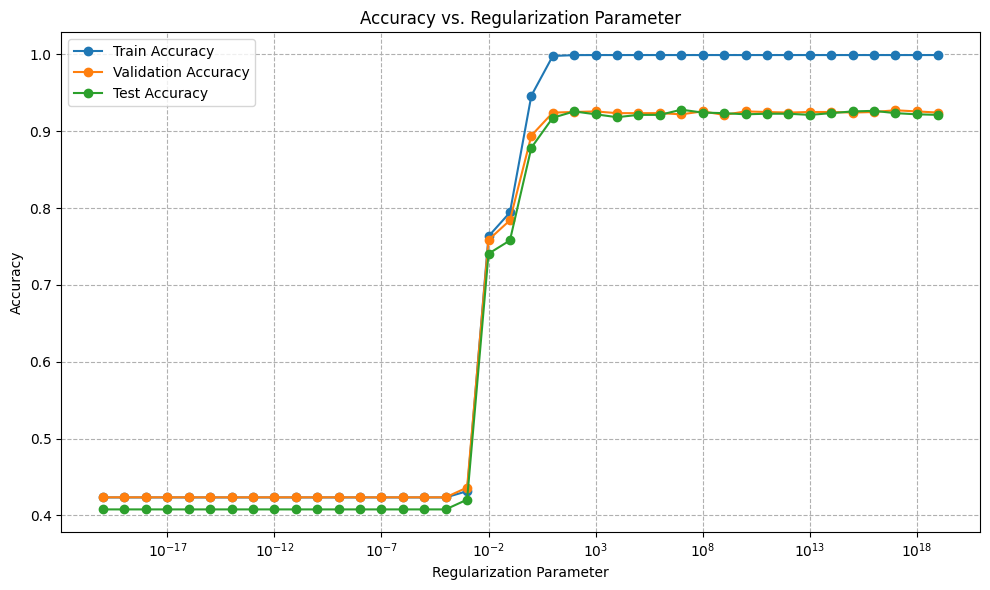

In [24]:
import matplotlib.pyplot as plt

# sklearnにおいては、Cが低いほど、正則化が強い
plt.figure(figsize=(10, 6))

plt.semilogx(regularization_params, train_accs, label='Train Accuracy', marker='o')
plt.semilogx(regularization_params, valid_accs, label='Validation Accuracy', marker='o')
plt.semilogx(regularization_params, test_accs, label='Test Accuracy', marker='o')

plt.title('Accuracy vs. Regularization Parameter')
plt.xlabel('Regularization Parameter')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.tight_layout()

plt.show()

## 59. ハイパーパラメータの探索
学習アルゴリズムや学習パラメータを変えながら，カテゴリ分類モデルを学習せよ．検証データ上の正解率が最も高くなる学習アルゴリズム・パラメータを求めよ．また，その学習アルゴリズム・パラメータを用いたときの評価データ上の正解率を求めよ．

In [ ]:
#今回はsolver（学習アルゴリズム）、max_iter, 正則化パラメータをずらしながら学習をしていく
#正則化のノルムはL2で固定
import warnings
from tqdm import tqdm
warnings.simplefilter('ignore')

solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
max_iters = [10**i for i in range(10)]
regularization_params = [10**i for i in range(-10, 10)]

max_valid_acc = 0
max_valid_acc_solver = ""
max_valid_acc_iters = 0
max_valid_acc_regularization_param = 0

# 総イテレーション数を計算して、1つのtqdmインスタンスで進行状況を管理する
total_iterations = len(solvers) * len(max_iters) * len(regularization_params)
pbar = tqdm(total=total_iterations)

for solver in solvers:
    for max_iter in max_iters:
        for regularization_param in regularization_params:
            lr = LogisticRegression(penalty='l2', solver=solver, C=regularization_param, max_iter=max_iter)
            lr.fit(X_train, Y_train)

            l2_prediction_train = lr.predict(X_train)
            l2_train_acc = accuracy_score(Y_train, l2_prediction_train)
            train_accs.append(l2_train_acc)

            l2_prediction_valid = lr.predict(X_valid)
            l2_valid_acc = accuracy_score(Y_valid, l2_prediction_valid)
            valid_accs.append(l2_valid_acc)
            if  l2_valid_acc > max_valid_acc:
                max_valid_acc = l2_valid_acc
                max_valid_acc_solver = solver
                max_valid_acc_iters = max_iter
                max_valid_acc_regularization_param = regularization_param
                max_valid_acc_model = lr

            print("{}, {}, {} : valid_accuracy = {}".format(solver, max_iter, regularization_param, l2_valid_acc))

            # ここでtqdmのカウントを1増やしている
            pbar.update(1)

pbar.close()

  0%|          | 3/1000 [00:00<01:31, 10.90it/s]

newton-cg, 1, 1e-10 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 1e-09 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 1e-08 : valid_accuracy = 0.4235382308845577


  0%|          | 5/1000 [00:00<01:27, 11.33it/s]

newton-cg, 1, 1e-07 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 1e-06 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 1e-05 : valid_accuracy = 0.4235382308845577


  1%|          | 9/1000 [00:00<01:25, 11.65it/s]

newton-cg, 1, 0.0001 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 0.001 : valid_accuracy = 0.4235382308845577
newton-cg, 1, 0.01 : valid_accuracy = 0.7263868065967016


  1%|          | 11/1000 [00:00<01:25, 11.55it/s]

newton-cg, 1, 0.1 : valid_accuracy = 0.7556221889055472
newton-cg, 1, 1 : valid_accuracy = 0.7638680659670165
newton-cg, 1, 10 : valid_accuracy = 0.7661169415292354


  2%|▏         | 15/1000 [00:01<01:27, 11.30it/s]

newton-cg, 1, 100 : valid_accuracy = 0.7661169415292354
newton-cg, 1, 1000 : valid_accuracy = 0.7661169415292354
newton-cg, 1, 10000 : valid_accuracy = 0.7661169415292354


  2%|▏         | 17/1000 [00:01<01:25, 11.49it/s]

newton-cg, 1, 100000 : valid_accuracy = 0.7661169415292354
newton-cg, 1, 1000000 : valid_accuracy = 0.7661169415292354
newton-cg, 1, 10000000 : valid_accuracy = 0.7661169415292354


  2%|▏         | 19/1000 [00:01<01:24, 11.65it/s]

newton-cg, 1, 100000000 : valid_accuracy = 0.7661169415292354
newton-cg, 1, 1000000000 : valid_accuracy = 0.7661169415292354


  2%|▏         | 21/1000 [00:02<02:08,  7.64it/s]

newton-cg, 10, 1e-10 : valid_accuracy = 0.4235382308845577


  2%|▏         | 22/1000 [00:02<02:31,  6.44it/s]

newton-cg, 10, 1e-09 : valid_accuracy = 0.4235382308845577


  2%|▏         | 23/1000 [00:02<02:46,  5.87it/s]

newton-cg, 10, 1e-08 : valid_accuracy = 0.4235382308845577


  2%|▏         | 24/1000 [00:02<03:01,  5.39it/s]

newton-cg, 10, 1e-07 : valid_accuracy = 0.4235382308845577


  3%|▎         | 26/1000 [00:03<03:16,  4.96it/s]

newton-cg, 10, 1e-06 : valid_accuracy = 0.4235382308845577
newton-cg, 10, 1e-05 : valid_accuracy = 0.4235382308845577


  3%|▎         | 27/1000 [00:03<03:29,  4.64it/s]

newton-cg, 10, 0.0001 : valid_accuracy = 0.4235382308845577


  3%|▎         | 28/1000 [00:03<03:31,  4.60it/s]

newton-cg, 10, 0.001 : valid_accuracy = 0.4362818590704648


  3%|▎         | 29/1000 [00:04<03:47,  4.26it/s]

newton-cg, 10, 0.01 : valid_accuracy = 0.7586206896551724


  3%|▎         | 30/1000 [00:04<04:13,  3.83it/s]

newton-cg, 10, 0.1 : valid_accuracy = 0.7841079460269865


  3%|▎         | 31/1000 [00:04<04:46,  3.39it/s]

newton-cg, 10, 1 : valid_accuracy = 0.8943028485757122


  3%|▎         | 32/1000 [00:05<05:21,  3.01it/s]

newton-cg, 10, 10 : valid_accuracy = 0.9235382308845578


  3%|▎         | 33/1000 [00:05<05:52,  2.74it/s]

newton-cg, 10, 100 : valid_accuracy = 0.9235382308845578


  3%|▎         | 34/1000 [00:06<06:26,  2.50it/s]

newton-cg, 10, 1000 : valid_accuracy = 0.9257871064467766


  4%|▎         | 35/1000 [00:06<06:48,  2.36it/s]

newton-cg, 10, 10000 : valid_accuracy = 0.9265367316341829


  4%|▎         | 36/1000 [00:07<07:11,  2.23it/s]

newton-cg, 10, 100000 : valid_accuracy = 0.9257871064467766


  4%|▎         | 37/1000 [00:07<07:16,  2.20it/s]

newton-cg, 10, 1000000 : valid_accuracy = 0.9265367316341829


  4%|▍         | 38/1000 [00:08<07:23,  2.17it/s]

newton-cg, 10, 10000000 : valid_accuracy = 0.9265367316341829


  4%|▍         | 39/1000 [00:08<07:38,  2.09it/s]

newton-cg, 10, 100000000 : valid_accuracy = 0.9265367316341829


  4%|▍         | 40/1000 [00:09<07:37,  2.10it/s]

newton-cg, 10, 1000000000 : valid_accuracy = 0.9265367316341829


  4%|▍         | 41/1000 [00:09<07:01,  2.27it/s]

newton-cg, 100, 1e-10 : valid_accuracy = 0.4235382308845577


  4%|▍         | 42/1000 [00:09<06:13,  2.56it/s]

newton-cg, 100, 1e-09 : valid_accuracy = 0.4235382308845577


  4%|▍         | 43/1000 [00:09<05:27,  2.92it/s]

newton-cg, 100, 1e-08 : valid_accuracy = 0.4235382308845577


  4%|▍         | 44/1000 [00:10<05:34,  2.85it/s]

newton-cg, 100, 1e-07 : valid_accuracy = 0.4235382308845577


  4%|▍         | 45/1000 [00:10<05:51,  2.71it/s]

newton-cg, 100, 1e-06 : valid_accuracy = 0.4235382308845577


  5%|▍         | 46/1000 [00:11<06:08,  2.59it/s]

newton-cg, 100, 1e-05 : valid_accuracy = 0.4235382308845577


  5%|▍         | 47/1000 [00:11<06:45,  2.35it/s]

newton-cg, 100, 0.0001 : valid_accuracy = 0.4235382308845577


  5%|▍         | 48/1000 [00:12<06:59,  2.27it/s]

newton-cg, 100, 0.001 : valid_accuracy = 0.4362818590704648


  5%|▍         | 49/1000 [00:12<07:32,  2.10it/s]

newton-cg, 100, 0.01 : valid_accuracy = 0.7586206896551724


  5%|▌         | 50/1000 [00:13<08:51,  1.79it/s]

newton-cg, 100, 0.1 : valid_accuracy = 0.7841079460269865


  5%|▌         | 51/1000 [00:14<11:20,  1.40it/s]

newton-cg, 100, 1 : valid_accuracy = 0.8943028485757122


  5%|▌         | 52/1000 [00:15<12:15,  1.29it/s]

newton-cg, 100, 10 : valid_accuracy = 0.9242878560719641


  5%|▌         | 53/1000 [00:16<13:50,  1.14it/s]

newton-cg, 100, 100 : valid_accuracy = 0.9250374812593704


  5%|▌         | 54/1000 [00:17<15:24,  1.02it/s]

newton-cg, 100, 1000 : valid_accuracy = 0.9265367316341829


  6%|▌         | 55/1000 [00:19<17:57,  1.14s/it]

newton-cg, 100, 10000 : valid_accuracy = 0.9265367316341829


  6%|▌         | 56/1000 [00:21<22:12,  1.41s/it]

newton-cg, 100, 100000 : valid_accuracy = 0.9235382308845578


  6%|▌         | 57/1000 [00:23<26:47,  1.70s/it]

newton-cg, 100, 1000000 : valid_accuracy = 0.9212893553223388


  6%|▌         | 58/1000 [00:25<29:22,  1.87s/it]

newton-cg, 100, 10000000 : valid_accuracy = 0.9205397301349325


  6%|▌         | 59/1000 [00:29<38:08,  2.43s/it]

newton-cg, 100, 100000000 : valid_accuracy = 0.9220389805097451


  6%|▌         | 60/1000 [00:31<34:51,  2.23s/it]

newton-cg, 100, 1000000000 : valid_accuracy = 0.9227886056971514


  6%|▌         | 61/1000 [00:31<25:58,  1.66s/it]

newton-cg, 1000, 1e-10 : valid_accuracy = 0.4235382308845577


  6%|▌         | 62/1000 [00:32<19:30,  1.25s/it]

newton-cg, 1000, 1e-09 : valid_accuracy = 0.4235382308845577


  6%|▋         | 63/1000 [00:32<14:41,  1.06it/s]

newton-cg, 1000, 1e-08 : valid_accuracy = 0.4235382308845577


  6%|▋         | 64/1000 [00:32<11:30,  1.36it/s]

newton-cg, 1000, 1e-07 : valid_accuracy = 0.4235382308845577


  6%|▋         | 65/1000 [00:32<09:05,  1.71it/s]

newton-cg, 1000, 1e-06 : valid_accuracy = 0.4235382308845577


  7%|▋         | 66/1000 [00:33<07:26,  2.09it/s]

newton-cg, 1000, 1e-05 : valid_accuracy = 0.4235382308845577


  7%|▋         | 67/1000 [00:33<06:28,  2.40it/s]

newton-cg, 1000, 0.0001 : valid_accuracy = 0.4235382308845577


  7%|▋         | 68/1000 [00:33<05:41,  2.73it/s]

newton-cg, 1000, 0.001 : valid_accuracy = 0.4362818590704648


  7%|▋         | 69/1000 [00:33<05:18,  2.92it/s]

newton-cg, 1000, 0.01 : valid_accuracy = 0.7586206896551724


  7%|▋         | 70/1000 [00:34<05:41,  2.73it/s]

newton-cg, 1000, 0.1 : valid_accuracy = 0.7841079460269865


  7%|▋         | 71/1000 [00:34<06:31,  2.37it/s]

newton-cg, 1000, 1 : valid_accuracy = 0.8943028485757122


  7%|▋         | 72/1000 [00:35<07:37,  2.03it/s]

newton-cg, 1000, 10 : valid_accuracy = 0.9242878560719641


  7%|▋         | 73/1000 [00:36<10:23,  1.49it/s]

newton-cg, 1000, 100 : valid_accuracy = 0.9250374812593704


  7%|▋         | 74/1000 [00:37<12:57,  1.19it/s]

newton-cg, 1000, 1000 : valid_accuracy = 0.9265367316341829


  8%|▊         | 75/1000 [00:39<16:15,  1.05s/it]

newton-cg, 1000, 10000 : valid_accuracy = 0.9265367316341829


  8%|▊         | 76/1000 [00:43<29:23,  1.91s/it]

newton-cg, 1000, 100000 : valid_accuracy = 0.9235382308845578


  8%|▊         | 77/1000 [00:46<34:39,  2.25s/it]

newton-cg, 1000, 1000000 : valid_accuracy = 0.9212893553223388


  8%|▊         | 78/1000 [00:48<32:20,  2.10s/it]

newton-cg, 1000, 10000000 : valid_accuracy = 0.9205397301349325


  8%|▊         | 79/1000 [00:49<31:03,  2.02s/it]

newton-cg, 1000, 100000000 : valid_accuracy = 0.9220389805097451


  8%|▊         | 80/1000 [00:51<29:09,  1.90s/it]

newton-cg, 1000, 1000000000 : valid_accuracy = 0.9227886056971514


  8%|▊         | 81/1000 [00:51<22:06,  1.44s/it]

newton-cg, 10000, 1e-10 : valid_accuracy = 0.4235382308845577


  8%|▊         | 82/1000 [00:52<16:39,  1.09s/it]

newton-cg, 10000, 1e-09 : valid_accuracy = 0.4235382308845577


  8%|▊         | 83/1000 [00:52<12:42,  1.20it/s]

newton-cg, 10000, 1e-08 : valid_accuracy = 0.4235382308845577


  8%|▊         | 84/1000 [00:52<10:04,  1.52it/s]

newton-cg, 10000, 1e-07 : valid_accuracy = 0.4235382308845577


  8%|▊         | 85/1000 [00:52<08:13,  1.86it/s]

newton-cg, 10000, 1e-06 : valid_accuracy = 0.4235382308845577


  9%|▊         | 86/1000 [00:53<06:43,  2.27it/s]

newton-cg, 10000, 1e-05 : valid_accuracy = 0.4235382308845577


  9%|▊         | 87/1000 [00:53<05:48,  2.62it/s]

newton-cg, 10000, 0.0001 : valid_accuracy = 0.4235382308845577


  9%|▉         | 88/1000 [00:53<05:15,  2.89it/s]

newton-cg, 10000, 0.001 : valid_accuracy = 0.4362818590704648


  9%|▉         | 89/1000 [00:53<05:00,  3.03it/s]

newton-cg, 10000, 0.01 : valid_accuracy = 0.7586206896551724


  9%|▉         | 90/1000 [00:54<05:16,  2.87it/s]

newton-cg, 10000, 0.1 : valid_accuracy = 0.7841079460269865


  9%|▉         | 91/1000 [00:55<08:36,  1.76it/s]

newton-cg, 10000, 1 : valid_accuracy = 0.8943028485757122


  9%|▉         | 92/1000 [00:56<12:31,  1.21it/s]

newton-cg, 10000, 10 : valid_accuracy = 0.9242878560719641


  9%|▉         | 93/1000 [00:58<18:45,  1.24s/it]

newton-cg, 10000, 100 : valid_accuracy = 0.9250374812593704


  9%|▉         | 94/1000 [01:00<18:48,  1.25s/it]

newton-cg, 10000, 1000 : valid_accuracy = 0.9265367316341829


 10%|▉         | 95/1000 [01:01<19:58,  1.32s/it]

newton-cg, 10000, 10000 : valid_accuracy = 0.9265367316341829


 10%|▉         | 96/1000 [01:03<22:54,  1.52s/it]

newton-cg, 10000, 100000 : valid_accuracy = 0.9235382308845578


 10%|▉         | 97/1000 [01:06<26:58,  1.79s/it]

newton-cg, 10000, 1000000 : valid_accuracy = 0.9212893553223388


 10%|▉         | 98/1000 [01:07<26:47,  1.78s/it]

newton-cg, 10000, 10000000 : valid_accuracy = 0.9205397301349325


 10%|▉         | 99/1000 [01:10<30:30,  2.03s/it]

newton-cg, 10000, 100000000 : valid_accuracy = 0.9220389805097451


 10%|█         | 100/1000 [01:13<36:05,  2.41s/it]

newton-cg, 10000, 1000000000 : valid_accuracy = 0.9227886056971514


 10%|█         | 101/1000 [01:14<26:48,  1.79s/it]

newton-cg, 100000, 1e-10 : valid_accuracy = 0.4235382308845577


 10%|█         | 102/1000 [01:14<19:50,  1.33s/it]

newton-cg, 100000, 1e-09 : valid_accuracy = 0.4235382308845577


 10%|█         | 103/1000 [01:14<14:54,  1.00it/s]

newton-cg, 100000, 1e-08 : valid_accuracy = 0.4235382308845577


 10%|█         | 104/1000 [01:14<11:31,  1.30it/s]

newton-cg, 100000, 1e-07 : valid_accuracy = 0.4235382308845577


 10%|█         | 105/1000 [01:15<09:06,  1.64it/s]

newton-cg, 100000, 1e-06 : valid_accuracy = 0.4235382308845577


 11%|█         | 106/1000 [01:15<07:20,  2.03it/s]

newton-cg, 100000, 1e-05 : valid_accuracy = 0.4235382308845577


 11%|█         | 107/1000 [01:15<06:15,  2.38it/s]

newton-cg, 100000, 0.0001 : valid_accuracy = 0.4235382308845577


 11%|█         | 108/1000 [01:15<05:38,  2.63it/s]

newton-cg, 100000, 0.001 : valid_accuracy = 0.4362818590704648


 11%|█         | 109/1000 [01:16<05:12,  2.85it/s]

newton-cg, 100000, 0.01 : valid_accuracy = 0.7586206896551724


 11%|█         | 110/1000 [01:16<05:17,  2.80it/s]

newton-cg, 100000, 0.1 : valid_accuracy = 0.7841079460269865


 11%|█         | 111/1000 [01:17<06:04,  2.44it/s]

newton-cg, 100000, 1 : valid_accuracy = 0.8943028485757122


 11%|█         | 112/1000 [01:17<07:10,  2.06it/s]

newton-cg, 100000, 10 : valid_accuracy = 0.9242878560719641


 11%|█▏        | 113/1000 [01:18<10:01,  1.47it/s]

newton-cg, 100000, 100 : valid_accuracy = 0.9250374812593704


 11%|█▏        | 114/1000 [01:20<12:22,  1.19it/s]

newton-cg, 100000, 1000 : valid_accuracy = 0.9265367316341829


 12%|█▏        | 115/1000 [01:21<15:14,  1.03s/it]

newton-cg, 100000, 10000 : valid_accuracy = 0.9265367316341829


 12%|█▏        | 116/1000 [01:23<19:27,  1.32s/it]

newton-cg, 100000, 100000 : valid_accuracy = 0.9235382308845578


 12%|█▏        | 117/1000 [01:28<35:15,  2.40s/it]

newton-cg, 100000, 1000000 : valid_accuracy = 0.9212893553223388


 12%|█▏        | 118/1000 [01:30<32:01,  2.18s/it]

newton-cg, 100000, 10000000 : valid_accuracy = 0.9205397301349325


 12%|█▏        | 119/1000 [01:31<30:14,  2.06s/it]

newton-cg, 100000, 100000000 : valid_accuracy = 0.9220389805097451


 12%|█▏        | 120/1000 [01:33<28:12,  1.92s/it]

newton-cg, 100000, 1000000000 : valid_accuracy = 0.9227886056971514


 12%|█▏        | 121/1000 [01:33<21:07,  1.44s/it]

newton-cg, 1000000, 1e-10 : valid_accuracy = 0.4235382308845577


 12%|█▏        | 123/1000 [01:34<11:59,  1.22it/s]

newton-cg, 1000000, 1e-09 : valid_accuracy = 0.4235382308845577
newton-cg, 1000000, 1e-08 : valid_accuracy = 0.4235382308845577


 12%|█▏        | 124/1000 [01:34<09:34,  1.52it/s]

newton-cg, 1000000, 1e-07 : valid_accuracy = 0.4235382308845577


 12%|█▎        | 125/1000 [01:34<07:39,  1.91it/s]

newton-cg, 1000000, 1e-06 : valid_accuracy = 0.4235382308845577


 13%|█▎        | 126/1000 [01:34<06:18,  2.31it/s]

newton-cg, 1000000, 1e-05 : valid_accuracy = 0.4235382308845577


 13%|█▎        | 127/1000 [01:35<05:29,  2.65it/s]

newton-cg, 1000000, 0.0001 : valid_accuracy = 0.4235382308845577


 13%|█▎        | 128/1000 [01:35<04:58,  2.92it/s]

newton-cg, 1000000, 0.001 : valid_accuracy = 0.4362818590704648


 13%|█▎        | 129/1000 [01:35<04:38,  3.13it/s]

newton-cg, 1000000, 0.01 : valid_accuracy = 0.7586206896551724


 13%|█▎        | 130/1000 [01:36<04:50,  3.00it/s]

newton-cg, 1000000, 0.1 : valid_accuracy = 0.7841079460269865


 13%|█▎        | 131/1000 [01:36<05:41,  2.54it/s]

newton-cg, 1000000, 1 : valid_accuracy = 0.8943028485757122


 13%|█▎        | 132/1000 [01:37<06:48,  2.12it/s]

newton-cg, 1000000, 10 : valid_accuracy = 0.9242878560719641


 13%|█▎        | 133/1000 [01:38<10:50,  1.33it/s]

newton-cg, 1000000, 100 : valid_accuracy = 0.9250374812593704


 13%|█▎        | 134/1000 [01:42<23:55,  1.66s/it]

newton-cg, 1000000, 1000 : valid_accuracy = 0.9265367316341829


 14%|█▎        | 135/1000 [01:44<23:47,  1.65s/it]

newton-cg, 1000000, 10000 : valid_accuracy = 0.9265367316341829


 14%|█▎        | 136/1000 [01:46<25:01,  1.74s/it]

newton-cg, 1000000, 100000 : valid_accuracy = 0.9235382308845578


 14%|█▎        | 137/1000 [01:48<27:31,  1.91s/it]

newton-cg, 1000000, 1000000 : valid_accuracy = 0.9212893553223388


 14%|█▍        | 138/1000 [01:50<26:17,  1.83s/it]

newton-cg, 1000000, 10000000 : valid_accuracy = 0.9205397301349325


 14%|█▍        | 139/1000 [01:51<26:17,  1.83s/it]

newton-cg, 1000000, 100000000 : valid_accuracy = 0.9220389805097451


 14%|█▍        | 140/1000 [01:53<27:19,  1.91s/it]

newton-cg, 1000000, 1000000000 : valid_accuracy = 0.9227886056971514


 14%|█▍        | 141/1000 [01:54<21:53,  1.53s/it]

newton-cg, 10000000, 1e-10 : valid_accuracy = 0.4235382308845577


 14%|█▍        | 142/1000 [01:55<17:23,  1.22s/it]

newton-cg, 10000000, 1e-09 : valid_accuracy = 0.4235382308845577


 14%|█▍        | 143/1000 [01:55<13:58,  1.02it/s]

newton-cg, 10000000, 1e-08 : valid_accuracy = 0.4235382308845577


 14%|█▍        | 144/1000 [01:55<11:23,  1.25it/s]

newton-cg, 10000000, 1e-07 : valid_accuracy = 0.4235382308845577


 14%|█▍        | 145/1000 [01:56<09:52,  1.44it/s]

newton-cg, 10000000, 1e-06 : valid_accuracy = 0.4235382308845577


 15%|█▍        | 146/1000 [01:56<08:41,  1.64it/s]

newton-cg, 10000000, 1e-05 : valid_accuracy = 0.4235382308845577


 15%|█▍        | 147/1000 [01:57<08:12,  1.73it/s]

newton-cg, 10000000, 0.0001 : valid_accuracy = 0.4235382308845577


 15%|█▍        | 148/1000 [01:57<07:52,  1.80it/s]

newton-cg, 10000000, 0.001 : valid_accuracy = 0.4362818590704648


 15%|█▍        | 149/1000 [01:58<06:48,  2.08it/s]

newton-cg, 10000000, 0.01 : valid_accuracy = 0.7586206896551724


 15%|█▌        | 150/1000 [01:58<06:27,  2.20it/s]

newton-cg, 10000000, 0.1 : valid_accuracy = 0.7841079460269865


 15%|█▌        | 151/1000 [01:58<06:43,  2.10it/s]

newton-cg, 10000000, 1 : valid_accuracy = 0.8943028485757122


 15%|█▌        | 152/1000 [01:59<07:28,  1.89it/s]

newton-cg, 10000000, 10 : valid_accuracy = 0.9242878560719641


 15%|█▌        | 153/1000 [02:00<09:35,  1.47it/s]

newton-cg, 10000000, 100 : valid_accuracy = 0.9250374812593704


 15%|█▌        | 154/1000 [02:02<12:23,  1.14it/s]

newton-cg, 10000000, 1000 : valid_accuracy = 0.9265367316341829


 16%|█▌        | 155/1000 [02:05<23:21,  1.66s/it]

newton-cg, 10000000, 10000 : valid_accuracy = 0.9265367316341829


 16%|█▌        | 156/1000 [02:10<39:20,  2.80s/it]

newton-cg, 10000000, 100000 : valid_accuracy = 0.9235382308845578


 16%|█▌        | 157/1000 [02:15<46:05,  3.28s/it]

newton-cg, 10000000, 1000000 : valid_accuracy = 0.9212893553223388


 16%|█▌        | 158/1000 [02:16<39:01,  2.78s/it]

newton-cg, 10000000, 10000000 : valid_accuracy = 0.9205397301349325


 16%|█▌        | 159/1000 [02:18<34:50,  2.49s/it]

newton-cg, 10000000, 100000000 : valid_accuracy = 0.9220389805097451


 16%|█▌        | 160/1000 [02:20<30:55,  2.21s/it]

newton-cg, 10000000, 1000000000 : valid_accuracy = 0.9227886056971514


 16%|█▌        | 161/1000 [02:20<22:57,  1.64s/it]

newton-cg, 100000000, 1e-10 : valid_accuracy = 0.4235382308845577


 16%|█▌        | 162/1000 [02:20<17:11,  1.23s/it]

newton-cg, 100000000, 1e-09 : valid_accuracy = 0.4235382308845577


 16%|█▋        | 163/1000 [02:21<12:54,  1.08it/s]

newton-cg, 100000000, 1e-08 : valid_accuracy = 0.4235382308845577


 16%|█▋        | 164/1000 [02:21<10:05,  1.38it/s]

newton-cg, 100000000, 1e-07 : valid_accuracy = 0.4235382308845577


 16%|█▋        | 165/1000 [02:21<07:56,  1.75it/s]

newton-cg, 100000000, 1e-06 : valid_accuracy = 0.4235382308845577


 17%|█▋        | 166/1000 [02:21<06:25,  2.16it/s]

newton-cg, 100000000, 1e-05 : valid_accuracy = 0.4235382308845577


 17%|█▋        | 167/1000 [02:22<05:28,  2.53it/s]

newton-cg, 100000000, 0.0001 : valid_accuracy = 0.4235382308845577


 17%|█▋        | 168/1000 [02:22<04:54,  2.82it/s]

newton-cg, 100000000, 0.001 : valid_accuracy = 0.4362818590704648


 17%|█▋        | 169/1000 [02:22<04:36,  3.00it/s]

newton-cg, 100000000, 0.01 : valid_accuracy = 0.7586206896551724


 17%|█▋        | 170/1000 [02:23<05:24,  2.56it/s]

newton-cg, 100000000, 0.1 : valid_accuracy = 0.7841079460269865


 17%|█▋        | 171/1000 [02:24<08:17,  1.67it/s]

newton-cg, 100000000, 1 : valid_accuracy = 0.8943028485757122


 17%|█▋        | 172/1000 [02:25<11:17,  1.22it/s]

newton-cg, 100000000, 10 : valid_accuracy = 0.9242878560719641


 17%|█▋        | 173/1000 [02:27<17:02,  1.24s/it]

newton-cg, 100000000, 100 : valid_accuracy = 0.9250374812593704


 17%|█▋        | 174/1000 [02:30<22:01,  1.60s/it]

newton-cg, 100000000, 1000 : valid_accuracy = 0.9265367316341829


 18%|█▊        | 175/1000 [02:32<25:25,  1.85s/it]

newton-cg, 100000000, 10000 : valid_accuracy = 0.9265367316341829


 18%|█▊        | 176/1000 [02:34<25:56,  1.89s/it]

newton-cg, 100000000, 100000 : valid_accuracy = 0.9235382308845578


 18%|█▊        | 177/1000 [02:36<27:43,  2.02s/it]

newton-cg, 100000000, 1000000 : valid_accuracy = 0.9212893553223388


 18%|█▊        | 178/1000 [02:38<26:21,  1.92s/it]

newton-cg, 100000000, 10000000 : valid_accuracy = 0.9205397301349325


 18%|█▊        | 179/1000 [02:40<25:56,  1.90s/it]

newton-cg, 100000000, 100000000 : valid_accuracy = 0.9220389805097451


 18%|█▊        | 180/1000 [02:42<24:32,  1.80s/it]

newton-cg, 100000000, 1000000000 : valid_accuracy = 0.9227886056971514


 18%|█▊        | 181/1000 [02:42<19:31,  1.43s/it]

newton-cg, 1000000000, 1e-10 : valid_accuracy = 0.4235382308845577


 18%|█▊        | 182/1000 [02:43<15:27,  1.13s/it]

newton-cg, 1000000000, 1e-09 : valid_accuracy = 0.4235382308845577


 18%|█▊        | 183/1000 [02:43<12:39,  1.08it/s]

newton-cg, 1000000000, 1e-08 : valid_accuracy = 0.4235382308845577


 18%|█▊        | 184/1000 [02:43<10:49,  1.26it/s]

newton-cg, 1000000000, 1e-07 : valid_accuracy = 0.4235382308845577


 18%|█▊        | 185/1000 [02:44<09:18,  1.46it/s]

newton-cg, 1000000000, 1e-06 : valid_accuracy = 0.4235382308845577


 19%|█▊        | 186/1000 [02:44<08:17,  1.64it/s]

newton-cg, 1000000000, 1e-05 : valid_accuracy = 0.4235382308845577


 19%|█▊        | 187/1000 [02:45<07:46,  1.74it/s]

newton-cg, 1000000000, 0.0001 : valid_accuracy = 0.4235382308845577


 19%|█▉        | 188/1000 [02:45<07:29,  1.81it/s]

newton-cg, 1000000000, 0.001 : valid_accuracy = 0.4362818590704648


 19%|█▉        | 189/1000 [02:46<07:31,  1.80it/s]

newton-cg, 1000000000, 0.01 : valid_accuracy = 0.7586206896551724


 19%|█▉        | 190/1000 [02:47<07:59,  1.69it/s]

newton-cg, 1000000000, 0.1 : valid_accuracy = 0.7841079460269865


 19%|█▉        | 191/1000 [02:47<07:40,  1.76it/s]

newton-cg, 1000000000, 1 : valid_accuracy = 0.8943028485757122


 19%|█▉        | 192/1000 [02:48<07:54,  1.70it/s]

newton-cg, 1000000000, 10 : valid_accuracy = 0.9242878560719641


 19%|█▉        | 193/1000 [02:49<09:51,  1.37it/s]

newton-cg, 1000000000, 100 : valid_accuracy = 0.9250374812593704


 19%|█▉        | 194/1000 [02:50<11:46,  1.14it/s]

newton-cg, 1000000000, 1000 : valid_accuracy = 0.9265367316341829


 20%|█▉        | 195/1000 [02:51<13:54,  1.04s/it]

newton-cg, 1000000000, 10000 : valid_accuracy = 0.9265367316341829


 20%|█▉        | 196/1000 [02:53<17:39,  1.32s/it]

newton-cg, 1000000000, 100000 : valid_accuracy = 0.9235382308845578


 20%|█▉        | 197/1000 [02:56<21:38,  1.62s/it]

newton-cg, 1000000000, 1000000 : valid_accuracy = 0.9212893553223388


 20%|█▉        | 198/1000 [02:58<25:15,  1.89s/it]

newton-cg, 1000000000, 10000000 : valid_accuracy = 0.9205397301349325


 20%|█▉        | 199/1000 [03:01<30:43,  2.30s/it]

newton-cg, 1000000000, 100000000 : valid_accuracy = 0.9220389805097451


 20%|██        | 200/1000 [03:03<27:45,  2.08s/it]

newton-cg, 1000000000, 1000000000 : valid_accuracy = 0.9227886056971514


 20%|██        | 201/1000 [03:03<20:31,  1.54s/it]

lbfgs, 1, 1e-10 : valid_accuracy = 0.4235382308845577


 20%|██        | 202/1000 [03:04<15:35,  1.17s/it]

lbfgs, 1, 1e-09 : valid_accuracy = 0.4235382308845577


 20%|██        | 203/1000 [03:04<11:44,  1.13it/s]

lbfgs, 1, 1e-08 : valid_accuracy = 0.4235382308845577


 20%|██        | 204/1000 [03:04<09:21,  1.42it/s]

lbfgs, 1, 1e-07 : valid_accuracy = 0.4235382308845577


 20%|██        | 205/1000 [03:04<07:42,  1.72it/s]

lbfgs, 1, 1e-06 : valid_accuracy = 0.4235382308845577


 21%|██        | 207/1000 [03:05<05:13,  2.53it/s]

lbfgs, 1, 1e-05 : valid_accuracy = 0.4235382308845577
lbfgs, 1, 0.0001 : valid_accuracy = 0.4235382308845577


 21%|██        | 208/1000 [03:05<04:33,  2.90it/s]

lbfgs, 1, 0.001 : valid_accuracy = 0.4235382308845577


 21%|██        | 209/1000 [03:05<04:10,  3.16it/s]

lbfgs, 1, 0.01 : valid_accuracy = 0.4235382308845577


 21%|██        | 210/1000 [03:06<04:04,  3.23it/s]

lbfgs, 1, 0.1 : valid_accuracy = 0.4235382308845577


 21%|██        | 211/1000 [03:06<03:54,  3.37it/s]

lbfgs, 1, 1 : valid_accuracy = 0.4235382308845577
lbfgs, 1, 10 : valid_accuracy = 0.4235382308845577

 21%|██        | 212/1000 [03:06<03:33,  3.69it/s]

 21%|██▏       | 213/1000 [03:06<03:37,  3.61it/s]

lbfgs, 1, 100 : valid_accuracy = 0.4235382308845577


 21%|██▏       | 214/1000 [03:07<03:42,  3.53it/s]

lbfgs, 1, 1000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 215/1000 [03:07<03:39,  3.58it/s]

lbfgs, 1, 10000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 216/1000 [03:07<03:39,  3.57it/s]

lbfgs, 1, 100000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 218/1000 [03:08<03:19,  3.92it/s]

lbfgs, 1, 1000000 : valid_accuracy = 0.4235382308845577
lbfgs, 1, 10000000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 219/1000 [03:08<03:25,  3.81it/s]

lbfgs, 1, 100000000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 220/1000 [03:08<03:29,  3.72it/s]

lbfgs, 1, 1000000000 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 221/1000 [03:09<04:20,  2.99it/s]

lbfgs, 10, 1e-10 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 222/1000 [03:09<04:23,  2.95it/s]

lbfgs, 10, 1e-09 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 223/1000 [03:10<04:39,  2.78it/s]

lbfgs, 10, 1e-08 : valid_accuracy = 0.4235382308845577


 22%|██▏       | 224/1000 [03:10<05:13,  2.48it/s]

lbfgs, 10, 1e-07 : valid_accuracy = 0.4235382308845577


 22%|██▎       | 225/1000 [03:11<05:31,  2.34it/s]

lbfgs, 10, 1e-06 : valid_accuracy = 0.4235382308845577


 23%|██▎       | 226/1000 [03:11<05:18,  2.43it/s]

lbfgs, 10, 1e-05 : valid_accuracy = 0.4235382308845577


 23%|██▎       | 227/1000 [03:12<05:56,  2.17it/s]

lbfgs, 10, 0.0001 : valid_accuracy = 0.4235382308845577


 23%|██▎       | 228/1000 [03:12<06:38,  1.94it/s]

lbfgs, 10, 0.001 : valid_accuracy = 0.4362818590704648


 23%|██▎       | 229/1000 [03:13<07:09,  1.79it/s]

lbfgs, 10, 0.01 : valid_accuracy = 0.7556221889055472


 23%|██▎       | 230/1000 [03:13<07:17,  1.76it/s]

lbfgs, 10, 0.1 : valid_accuracy = 0.7653673163418291


 23%|██▎       | 231/1000 [03:14<07:31,  1.70it/s]

lbfgs, 10, 1 : valid_accuracy = 0.7961019490254873


 23%|██▎       | 232/1000 [03:15<07:19,  1.75it/s]

lbfgs, 10, 10 : valid_accuracy = 0.802848575712144


 23%|██▎       | 233/1000 [03:15<07:44,  1.65it/s]

lbfgs, 10, 100 : valid_accuracy = 0.8035982008995503


 23%|██▎       | 234/1000 [03:16<07:29,  1.70it/s]

lbfgs, 10, 1000 : valid_accuracy = 0.8035982008995503


 24%|██▎       | 235/1000 [03:16<06:58,  1.83it/s]

lbfgs, 10, 10000 : valid_accuracy = 0.8035982008995503


 24%|██▎       | 236/1000 [03:17<06:17,  2.02it/s]

lbfgs, 10, 100000 : valid_accuracy = 0.8035982008995503


 24%|██▎       | 237/1000 [03:17<05:39,  2.25it/s]

lbfgs, 10, 1000000 : valid_accuracy = 0.8035982008995503


 24%|██▍       | 238/1000 [03:17<05:30,  2.31it/s]

lbfgs, 10, 10000000 : valid_accuracy = 0.8035982008995503


 24%|██▍       | 239/1000 [03:18<05:17,  2.40it/s]

lbfgs, 10, 100000000 : valid_accuracy = 0.8035982008995503


 24%|██▍       | 240/1000 [03:18<05:13,  2.42it/s]

lbfgs, 10, 1000000000 : valid_accuracy = 0.8035982008995503


 24%|██▍       | 241/1000 [03:19<06:32,  1.93it/s]

lbfgs, 100, 1e-10 : valid_accuracy = 0.4235382308845577


 24%|██▍       | 242/1000 [03:20<08:47,  1.44it/s]

lbfgs, 100, 1e-09 : valid_accuracy = 0.4235382308845577


 24%|██▍       | 243/1000 [03:21<09:30,  1.33it/s]

lbfgs, 100, 1e-08 : valid_accuracy = 0.4235382308845577


 24%|██▍       | 244/1000 [03:22<09:12,  1.37it/s]

lbfgs, 100, 1e-07 : valid_accuracy = 0.4235382308845577


 24%|██▍       | 245/1000 [03:22<08:29,  1.48it/s]

lbfgs, 100, 1e-06 : valid_accuracy = 0.4235382308845577


 25%|██▍       | 246/1000 [03:23<07:51,  1.60it/s]

lbfgs, 100, 1e-05 : valid_accuracy = 0.4235382308845577


 25%|██▍       | 247/1000 [03:23<07:21,  1.71it/s]

lbfgs, 100, 0.0001 : valid_accuracy = 0.4235382308845577


 25%|██▍       | 248/1000 [03:23<06:27,  1.94it/s]

lbfgs, 100, 0.001 : valid_accuracy = 0.4362818590704648


 25%|██▍       | 249/1000 [03:24<06:12,  2.02it/s]

lbfgs, 100, 0.01 : valid_accuracy = 0.7586206896551724


 25%|██▌       | 250/1000 [03:25<07:21,  1.70it/s]

lbfgs, 100, 0.1 : valid_accuracy = 0.7841079460269865


 25%|██▌       | 251/1000 [03:27<14:54,  1.19s/it]

lbfgs, 100, 1 : valid_accuracy = 0.8943028485757122


 25%|██▌       | 252/1000 [03:31<24:50,  1.99s/it]

lbfgs, 100, 10 : valid_accuracy = 0.9205397301349325


 25%|██▌       | 253/1000 [03:33<25:35,  2.06s/it]

lbfgs, 100, 100 : valid_accuracy = 0.9257871064467766


 25%|██▌       | 254/1000 [03:35<25:24,  2.04s/it]

lbfgs, 100, 1000 : valid_accuracy = 0.9227886056971514


 26%|██▌       | 255/1000 [03:38<25:54,  2.09s/it]

lbfgs, 100, 10000 : valid_accuracy = 0.9242878560719641


 26%|██▌       | 256/1000 [03:40<25:41,  2.07s/it]

lbfgs, 100, 100000 : valid_accuracy = 0.9167916041979011


 26%|██▌       | 257/1000 [03:42<28:17,  2.28s/it]

lbfgs, 100, 1000000 : valid_accuracy = 0.9182908545727136


 26%|██▌       | 258/1000 [03:46<33:32,  2.71s/it]

lbfgs, 100, 10000000 : valid_accuracy = 0.9175412293853074


 26%|██▌       | 259/1000 [03:48<30:34,  2.48s/it]

lbfgs, 100, 100000000 : valid_accuracy = 0.9220389805097451


 26%|██▌       | 260/1000 [03:50<29:51,  2.42s/it]

lbfgs, 100, 1000000000 : valid_accuracy = 0.9152923538230885


 26%|██▌       | 261/1000 [03:51<23:53,  1.94s/it]

lbfgs, 1000, 1e-10 : valid_accuracy = 0.4235382308845577


 26%|██▌       | 262/1000 [03:52<20:38,  1.68s/it]

lbfgs, 1000, 1e-09 : valid_accuracy = 0.4235382308845577


 26%|██▋       | 263/1000 [03:53<18:37,  1.52s/it]

lbfgs, 1000, 1e-08 : valid_accuracy = 0.4235382308845577


 26%|██▋       | 264/1000 [03:54<15:46,  1.29s/it]

lbfgs, 1000, 1e-07 : valid_accuracy = 0.4235382308845577


 26%|██▋       | 265/1000 [03:55<12:41,  1.04s/it]

lbfgs, 1000, 1e-06 : valid_accuracy = 0.4235382308845577


 27%|██▋       | 266/1000 [03:55<11:04,  1.10it/s]

lbfgs, 1000, 1e-05 : valid_accuracy = 0.4235382308845577


 27%|██▋       | 267/1000 [03:56<09:17,  1.31it/s]

lbfgs, 1000, 0.0001 : valid_accuracy = 0.4235382308845577


 27%|██▋       | 268/1000 [03:56<08:10,  1.49it/s]

lbfgs, 1000, 0.001 : valid_accuracy = 0.4362818590704648


 27%|██▋       | 269/1000 [03:57<08:33,  1.42it/s]

lbfgs, 1000, 0.01 : valid_accuracy = 0.7586206896551724


 27%|██▋       | 270/1000 [03:59<15:16,  1.26s/it]

lbfgs, 1000, 0.1 : valid_accuracy = 0.7841079460269865


 27%|██▋       | 271/1000 [04:03<22:23,  1.84s/it]

lbfgs, 1000, 1 : valid_accuracy = 0.8943028485757122


 27%|██▋       | 272/1000 [04:07<30:50,  2.54s/it]

lbfgs, 1000, 10 : valid_accuracy = 0.9242878560719641


 27%|██▋       | 273/1000 [04:15<49:46,  4.11s/it]

lbfgs, 1000, 100 : valid_accuracy = 0.9250374812593704


 27%|██▋       | 274/1000 [04:24<1:07:55,  5.61s/it]

lbfgs, 1000, 1000 : valid_accuracy = 0.9265367316341829


 28%|██▊       | 275/1000 [04:41<1:49:55,  9.10s/it]

lbfgs, 1000, 10000 : valid_accuracy = 0.9265367316341829


 28%|██▊       | 276/1000 [05:07<2:52:48, 14.32s/it]

lbfgs, 1000, 100000 : valid_accuracy = 0.9235382308845578


 28%|██▊       | 277/1000 [05:31<3:24:30, 16.97s/it]

lbfgs, 1000, 1000000 : valid_accuracy = 0.9182908545727136


 28%|██▊       | 278/1000 [05:53<3:42:20, 18.48s/it]

lbfgs, 1000, 10000000 : valid_accuracy = 0.9167916041979011


 28%|██▊       | 279/1000 [06:05<3:21:51, 16.80s/it]

lbfgs, 1000, 100000000 : valid_accuracy = 0.9190404797601199


 28%|██▊       | 280/1000 [06:09<2:34:26, 12.87s/it]

lbfgs, 1000, 1000000000 : valid_accuracy = 0.9175412293853074


 28%|██▊       | 281/1000 [06:10<1:52:24,  9.38s/it]

lbfgs, 10000, 1e-10 : valid_accuracy = 0.4235382308845577


 28%|██▊       | 282/1000 [06:13<1:26:45,  7.25s/it]

lbfgs, 10000, 1e-09 : valid_accuracy = 0.4235382308845577


 28%|██▊       | 283/1000 [06:14<1:07:19,  5.63s/it]

lbfgs, 10000, 1e-08 : valid_accuracy = 0.4235382308845577


 28%|██▊       | 284/1000 [06:15<49:46,  4.17s/it]  

lbfgs, 10000, 1e-07 : valid_accuracy = 0.4235382308845577


 28%|██▊       | 285/1000 [06:16<36:35,  3.07s/it]

lbfgs, 10000, 1e-06 : valid_accuracy = 0.4235382308845577


 29%|██▊       | 286/1000 [06:16<27:16,  2.29s/it]

lbfgs, 10000, 1e-05 : valid_accuracy = 0.4235382308845577


 29%|██▊       | 287/1000 [06:17<20:42,  1.74s/it]

lbfgs, 10000, 0.0001 : valid_accuracy = 0.4235382308845577


 29%|██▉       | 288/1000 [06:17<15:38,  1.32s/it]

lbfgs, 10000, 0.001 : valid_accuracy = 0.4362818590704648


 29%|██▉       | 289/1000 [06:18<12:47,  1.08s/it]

lbfgs, 10000, 0.01 : valid_accuracy = 0.7586206896551724


 29%|██▉       | 290/1000 [06:19<12:41,  1.07s/it]

lbfgs, 10000, 0.1 : valid_accuracy = 0.7841079460269865


 29%|██▉       | 291/1000 [06:21<17:35,  1.49s/it]

lbfgs, 10000, 1 : valid_accuracy = 0.8943028485757122


 29%|██▉       | 292/1000 [06:27<33:06,  2.81s/it]

lbfgs, 10000, 10 : valid_accuracy = 0.9242878560719641


 29%|██▉       | 293/1000 [06:34<48:16,  4.10s/it]

lbfgs, 10000, 100 : valid_accuracy = 0.9250374812593704


 29%|██▉       | 294/1000 [06:45<1:14:07,  6.30s/it]

lbfgs, 10000, 1000 : valid_accuracy = 0.9265367316341829


 30%|██▉       | 295/1000 [07:04<1:56:24,  9.91s/it]

lbfgs, 10000, 10000 : valid_accuracy = 0.9265367316341829


 30%|██▉       | 296/1000 [07:41<3:32:49, 18.14s/it]

lbfgs, 10000, 100000 : valid_accuracy = 0.9235382308845578


 30%|██▉       | 297/1000 [08:34<5:32:58, 28.42s/it]

lbfgs, 10000, 1000000 : valid_accuracy = 0.9220389805097451


 30%|██▉       | 298/1000 [09:18<6:27:10, 33.09s/it]

lbfgs, 10000, 10000000 : valid_accuracy = 0.9167916041979011


 30%|██▉       | 299/1000 [09:31<5:17:04, 27.14s/it]

lbfgs, 10000, 100000000 : valid_accuracy = 0.9190404797601199


 30%|███       | 300/1000 [09:35<3:55:19, 20.17s/it]

lbfgs, 10000, 1000000000 : valid_accuracy = 0.9175412293853074


 30%|███       | 301/1000 [09:36<2:47:29, 14.38s/it]

lbfgs, 100000, 1e-10 : valid_accuracy = 0.4235382308845577


 30%|███       | 302/1000 [09:37<2:01:13, 10.42s/it]

lbfgs, 100000, 1e-09 : valid_accuracy = 0.4235382308845577


 30%|███       | 303/1000 [09:38<1:30:40,  7.81s/it]

lbfgs, 100000, 1e-08 : valid_accuracy = 0.4235382308845577


 30%|███       | 304/1000 [09:40<1:08:15,  5.88s/it]

lbfgs, 100000, 1e-07 : valid_accuracy = 0.4235382308845577


 30%|███       | 305/1000 [09:41<50:26,  4.35s/it]  

lbfgs, 100000, 1e-06 : valid_accuracy = 0.4235382308845577


 31%|███       | 306/1000 [09:42<38:35,  3.34s/it]

lbfgs, 100000, 1e-05 : valid_accuracy = 0.4235382308845577


 31%|███       | 307/1000 [09:42<29:08,  2.52s/it]

lbfgs, 100000, 0.0001 : valid_accuracy = 0.4235382308845577


 31%|███       | 308/1000 [09:43<21:37,  1.88s/it]

lbfgs, 100000, 0.001 : valid_accuracy = 0.4362818590704648


 31%|███       | 309/1000 [09:43<16:34,  1.44s/it]

lbfgs, 100000, 0.01 : valid_accuracy = 0.7586206896551724


 31%|███       | 310/1000 [09:44<14:26,  1.26s/it]

lbfgs, 100000, 0.1 : valid_accuracy = 0.7841079460269865


 31%|███       | 311/1000 [09:46<18:36,  1.62s/it]

lbfgs, 100000, 1 : valid_accuracy = 0.8943028485757122


 31%|███       | 312/1000 [09:51<28:49,  2.51s/it]

lbfgs, 100000, 10 : valid_accuracy = 0.9242878560719641


 31%|███▏      | 313/1000 [10:01<54:23,  4.75s/it]

lbfgs, 100000, 100 : valid_accuracy = 0.9250374812593704


 31%|███▏      | 314/1000 [10:13<1:18:23,  6.86s/it]

lbfgs, 100000, 1000 : valid_accuracy = 0.9265367316341829


 32%|███▏      | 315/1000 [10:31<1:56:17, 10.19s/it]

lbfgs, 100000, 10000 : valid_accuracy = 0.9265367316341829


 32%|███▏      | 316/1000 [11:04<3:15:51, 17.18s/it]

lbfgs, 100000, 100000 : valid_accuracy = 0.9235382308845578


 32%|███▏      | 317/1000 [11:57<5:16:46, 27.83s/it]

lbfgs, 100000, 1000000 : valid_accuracy = 0.9220389805097451


 32%|███▏      | 318/1000 [12:43<6:19:37, 33.40s/it]

lbfgs, 100000, 10000000 : valid_accuracy = 0.9167916041979011


 32%|███▏      | 319/1000 [12:56<5:10:37, 27.37s/it]

lbfgs, 100000, 100000000 : valid_accuracy = 0.9190404797601199


 32%|███▏      | 320/1000 [13:00<3:48:46, 20.19s/it]

lbfgs, 100000, 1000000000 : valid_accuracy = 0.9175412293853074


 32%|███▏      | 321/1000 [13:01<2:42:27, 14.36s/it]

lbfgs, 1000000, 1e-10 : valid_accuracy = 0.4235382308845577


 32%|███▏      | 322/1000 [13:02<1:57:15, 10.38s/it]

lbfgs, 1000000, 1e-09 : valid_accuracy = 0.4235382308845577


 32%|███▏      | 323/1000 [13:03<1:24:59,  7.53s/it]

lbfgs, 1000000, 1e-08 : valid_accuracy = 0.4235382308845577


 32%|███▏      | 324/1000 [13:03<1:01:49,  5.49s/it]

lbfgs, 1000000, 1e-07 : valid_accuracy = 0.4235382308845577


 32%|███▎      | 325/1000 [13:04<44:56,  3.99s/it]  

lbfgs, 1000000, 1e-06 : valid_accuracy = 0.4235382308845577


 33%|███▎      | 326/1000 [13:05<33:57,  3.02s/it]

lbfgs, 1000000, 1e-05 : valid_accuracy = 0.4235382308845577


 33%|███▎      | 327/1000 [13:05<25:57,  2.31s/it]

lbfgs, 1000000, 0.0001 : valid_accuracy = 0.4235382308845577


 33%|███▎      | 328/1000 [13:06<20:08,  1.80s/it]

lbfgs, 1000000, 0.001 : valid_accuracy = 0.4362818590704648


 33%|███▎      | 329/1000 [13:07<16:50,  1.51s/it]

lbfgs, 1000000, 0.01 : valid_accuracy = 0.7586206896551724


 33%|███▎      | 330/1000 [13:08<17:34,  1.57s/it]

lbfgs, 1000000, 0.1 : valid_accuracy = 0.7841079460269865


 33%|███▎      | 331/1000 [13:11<21:29,  1.93s/it]

lbfgs, 1000000, 1 : valid_accuracy = 0.8943028485757122


 33%|███▎      | 332/1000 [13:15<28:34,  2.57s/it]

lbfgs, 1000000, 10 : valid_accuracy = 0.9242878560719641


 33%|███▎      | 333/1000 [13:24<48:55,  4.40s/it]

lbfgs, 1000000, 100 : valid_accuracy = 0.9250374812593704


 33%|███▎      | 334/1000 [13:33<1:05:02,  5.86s/it]

lbfgs, 1000000, 1000 : valid_accuracy = 0.9265367316341829


 34%|███▎      | 335/1000 [13:51<1:43:55,  9.38s/it]

lbfgs, 1000000, 10000 : valid_accuracy = 0.9265367316341829


 34%|███▎      | 336/1000 [14:24<3:02:45, 16.51s/it]

lbfgs, 1000000, 100000 : valid_accuracy = 0.9235382308845578


 34%|███▎      | 337/1000 [15:21<5:16:12, 28.62s/it]

lbfgs, 1000000, 1000000 : valid_accuracy = 0.9220389805097451


 34%|███▍      | 338/1000 [16:04<6:04:14, 33.01s/it]

lbfgs, 1000000, 10000000 : valid_accuracy = 0.9167916041979011


 34%|███▍      | 339/1000 [16:16<4:54:12, 26.71s/it]

lbfgs, 1000000, 100000000 : valid_accuracy = 0.9190404797601199


 34%|███▍      | 340/1000 [16:22<3:45:34, 20.51s/it]

lbfgs, 1000000, 1000000000 : valid_accuracy = 0.9175412293853074


 34%|███▍      | 341/1000 [16:23<2:40:06, 14.58s/it]

lbfgs, 10000000, 1e-10 : valid_accuracy = 0.4235382308845577


 34%|███▍      | 342/1000 [16:24<1:55:30, 10.53s/it]

lbfgs, 10000000, 1e-09 : valid_accuracy = 0.4235382308845577


 34%|███▍      | 343/1000 [16:25<1:24:30,  7.72s/it]

lbfgs, 10000000, 1e-08 : valid_accuracy = 0.4235382308845577


 34%|███▍      | 344/1000 [16:26<1:01:53,  5.66s/it]

lbfgs, 10000000, 1e-07 : valid_accuracy = 0.4235382308845577


 34%|███▍      | 345/1000 [16:27<45:14,  4.14s/it]  

lbfgs, 10000000, 1e-06 : valid_accuracy = 0.4235382308845577


 35%|███▍      | 346/1000 [16:27<33:41,  3.09s/it]

lbfgs, 10000000, 1e-05 : valid_accuracy = 0.4235382308845577


 35%|███▍      | 347/1000 [16:28<24:42,  2.27s/it]

lbfgs, 10000000, 0.0001 : valid_accuracy = 0.4235382308845577


 35%|███▍      | 348/1000 [16:28<18:22,  1.69s/it]

lbfgs, 10000000, 0.001 : valid_accuracy = 0.4362818590704648


 35%|███▍      | 349/1000 [16:28<14:27,  1.33s/it]

lbfgs, 10000000, 0.01 : valid_accuracy = 0.7586206896551724


 35%|███▌      | 350/1000 [16:30<14:02,  1.30s/it]

lbfgs, 10000000, 0.1 : valid_accuracy = 0.7841079460269865


 35%|███▌      | 351/1000 [16:32<17:04,  1.58s/it]

lbfgs, 10000000, 1 : valid_accuracy = 0.8943028485757122


 35%|███▌      | 352/1000 [16:38<32:25,  3.00s/it]

lbfgs, 10000000, 10 : valid_accuracy = 0.9242878560719641


 35%|███▌      | 353/1000 [16:44<41:18,  3.83s/it]

lbfgs, 10000000, 100 : valid_accuracy = 0.9250374812593704


 35%|███▌      | 354/1000 [16:55<1:05:29,  6.08s/it]

lbfgs, 10000000, 1000 : valid_accuracy = 0.9265367316341829


 36%|███▌      | 355/1000 [17:12<1:39:53,  9.29s/it]

lbfgs, 10000000, 10000 : valid_accuracy = 0.9265367316341829


 36%|███▌      | 356/1000 [17:50<3:10:34, 17.75s/it]

lbfgs, 10000000, 100000 : valid_accuracy = 0.9235382308845578


 36%|███▌      | 357/1000 [18:43<5:03:28, 28.32s/it]

lbfgs, 10000000, 1000000 : valid_accuracy = 0.9220389805097451


 36%|███▌      | 358/1000 [19:28<5:59:09, 33.57s/it]

lbfgs, 10000000, 10000000 : valid_accuracy = 0.9167916041979011


 36%|███▌      | 359/1000 [19:41<4:53:07, 27.44s/it]

lbfgs, 10000000, 100000000 : valid_accuracy = 0.9190404797601199


 36%|███▌      | 360/1000 [19:46<3:38:12, 20.46s/it]

lbfgs, 10000000, 1000000000 : valid_accuracy = 0.9175412293853074


 36%|███▌      | 361/1000 [19:47<2:36:50, 14.73s/it]

lbfgs, 100000000, 1e-10 : valid_accuracy = 0.4235382308845577


 36%|███▌      | 362/1000 [19:49<1:55:40, 10.88s/it]

lbfgs, 100000000, 1e-09 : valid_accuracy = 0.4235382308845577


 36%|███▋      | 363/1000 [19:50<1:25:32,  8.06s/it]

lbfgs, 100000000, 1e-08 : valid_accuracy = 0.4235382308845577


 36%|███▋      | 364/1000 [19:51<1:01:43,  5.82s/it]

lbfgs, 100000000, 1e-07 : valid_accuracy = 0.4235382308845577


 36%|███▋      | 365/1000 [19:51<44:48,  4.23s/it]  

lbfgs, 100000000, 1e-06 : valid_accuracy = 0.4235382308845577


 37%|███▋      | 366/1000 [19:52<33:05,  3.13s/it]

lbfgs, 100000000, 1e-05 : valid_accuracy = 0.4235382308845577


 37%|███▋      | 367/1000 [19:53<24:34,  2.33s/it]

lbfgs, 100000000, 0.0001 : valid_accuracy = 0.4235382308845577


 37%|███▋      | 368/1000 [19:53<18:17,  1.74s/it]

lbfgs, 100000000, 0.001 : valid_accuracy = 0.4362818590704648


 37%|███▋      | 369/1000 [19:53<14:06,  1.34s/it]

lbfgs, 100000000, 0.01 : valid_accuracy = 0.7586206896551724


 37%|███▋      | 370/1000 [19:54<13:24,  1.28s/it]

lbfgs, 100000000, 0.1 : valid_accuracy = 0.7841079460269865


 37%|███▋      | 371/1000 [19:58<21:05,  2.01s/it]

lbfgs, 100000000, 1 : valid_accuracy = 0.8943028485757122


 37%|███▋      | 372/1000 [20:05<36:57,  3.53s/it]

lbfgs, 100000000, 10 : valid_accuracy = 0.9242878560719641


 37%|███▋      | 373/1000 [20:12<46:10,  4.42s/it]

lbfgs, 100000000, 100 : valid_accuracy = 0.9250374812593704


 37%|███▋      | 374/1000 [20:23<1:06:32,  6.38s/it]

lbfgs, 100000000, 1000 : valid_accuracy = 0.9265367316341829


 38%|███▊      | 375/1000 [20:39<1:38:45,  9.48s/it]

lbfgs, 100000000, 10000 : valid_accuracy = 0.9265367316341829


 38%|███▊      | 376/1000 [21:12<2:51:06, 16.45s/it]

lbfgs, 100000000, 100000 : valid_accuracy = 0.9235382308845578


 38%|███▊      | 377/1000 [22:07<4:50:06, 27.94s/it]

lbfgs, 100000000, 1000000 : valid_accuracy = 0.9220389805097451


 38%|███▊      | 378/1000 [22:53<5:46:55, 33.47s/it]

lbfgs, 100000000, 10000000 : valid_accuracy = 0.9167916041979011


 38%|███▊      | 379/1000 [23:06<4:41:35, 27.21s/it]

lbfgs, 100000000, 100000000 : valid_accuracy = 0.9190404797601199


 38%|███▊      | 380/1000 [23:10<3:29:04, 20.23s/it]

lbfgs, 100000000, 1000000000 : valid_accuracy = 0.9175412293853074


 38%|███▊      | 381/1000 [23:11<2:28:46, 14.42s/it]

lbfgs, 1000000000, 1e-10 : valid_accuracy = 0.4235382308845577


 38%|███▊      | 382/1000 [23:12<1:47:32, 10.44s/it]

lbfgs, 1000000000, 1e-09 : valid_accuracy = 0.4235382308845577


 38%|███▊      | 383/1000 [23:13<1:18:20,  7.62s/it]

lbfgs, 1000000000, 1e-08 : valid_accuracy = 0.4235382308845577


 38%|███▊      | 384/1000 [23:14<57:13,  5.57s/it]  

lbfgs, 1000000000, 1e-07 : valid_accuracy = 0.4235382308845577


 38%|███▊      | 385/1000 [23:15<43:03,  4.20s/it]

lbfgs, 1000000000, 1e-06 : valid_accuracy = 0.4235382308845577


 39%|███▊      | 386/1000 [23:15<32:33,  3.18s/it]

lbfgs, 1000000000, 1e-05 : valid_accuracy = 0.4235382308845577


 39%|███▊      | 387/1000 [23:16<24:39,  2.41s/it]

lbfgs, 1000000000, 0.0001 : valid_accuracy = 0.4235382308845577


 39%|███▉      | 388/1000 [23:17<18:46,  1.84s/it]

lbfgs, 1000000000, 0.001 : valid_accuracy = 0.4362818590704648


 39%|███▉      | 389/1000 [23:17<15:16,  1.50s/it]

lbfgs, 1000000000, 0.01 : valid_accuracy = 0.7586206896551724


 39%|███▉      | 390/1000 [23:19<15:05,  1.48s/it]

lbfgs, 1000000000, 0.1 : valid_accuracy = 0.7841079460269865


 39%|███▉      | 391/1000 [23:21<18:37,  1.83s/it]

lbfgs, 1000000000, 1 : valid_accuracy = 0.8943028485757122


 39%|███▉      | 392/1000 [23:25<24:51,  2.45s/it]

lbfgs, 1000000000, 10 : valid_accuracy = 0.9242878560719641


 39%|███▉      | 393/1000 [23:34<42:52,  4.24s/it]

lbfgs, 1000000000, 100 : valid_accuracy = 0.9250374812593704


 39%|███▉      | 394/1000 [23:43<57:59,  5.74s/it]

lbfgs, 1000000000, 1000 : valid_accuracy = 0.9265367316341829


 40%|███▉      | 395/1000 [24:01<1:36:34,  9.58s/it]

lbfgs, 1000000000, 10000 : valid_accuracy = 0.9265367316341829


 40%|███▉      | 396/1000 [24:35<2:49:52, 16.88s/it]

lbfgs, 1000000000, 100000 : valid_accuracy = 0.9235382308845578


 40%|███▉      | 397/1000 [25:31<4:45:54, 28.45s/it]

lbfgs, 1000000000, 1000000 : valid_accuracy = 0.9220389805097451


 40%|███▉      | 398/1000 [26:17<5:38:59, 33.79s/it]

lbfgs, 1000000000, 10000000 : valid_accuracy = 0.9167916041979011


 40%|███▉      | 399/1000 [26:29<4:32:58, 27.25s/it]

lbfgs, 1000000000, 100000000 : valid_accuracy = 0.9190404797601199


 40%|████      | 403/1000 [26:34<1:29:55,  9.04s/it]

lbfgs, 1000000000, 1000000000 : valid_accuracy = 0.9175412293853074
liblinear, 1, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 1, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 1, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 1, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 1, 1e-06 : valid_accuracy = 0.4235382308845577


 41%|████      | 410/1000 [26:34<26:53,  2.73s/it]

liblinear, 1, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 1, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 1, 0.001 : valid_accuracy = 0.4280359820089955
liblinear, 1, 0.01 : valid_accuracy = 0.7286356821589205
liblinear, 1, 0.1 : valid_accuracy = 0.7571214392803598
liblinear, 1, 1 : valid_accuracy = 0.7706146926536732


 42%|████▏     | 416/1000 [26:35<12:19,  1.27s/it]

liblinear, 1, 10 : valid_accuracy = 0.7736131934032984
liblinear, 1, 100 : valid_accuracy = 0.7743628185907047
liblinear, 1, 1000 : valid_accuracy = 0.7743628185907047
liblinear, 1, 10000 : valid_accuracy = 0.7743628185907047
liblinear, 1, 100000 : valid_accuracy = 0.7743628185907047
liblinear, 1, 1000000 : valid_accuracy = 0.7743628185907047


 42%|████▏     | 423/1000 [26:35<05:24,  1.78it/s]

liblinear, 1, 10000000 : valid_accuracy = 0.7743628185907047
liblinear, 1, 100000000 : valid_accuracy = 0.7743628185907047
liblinear, 1, 1000000000 : valid_accuracy = 0.7743628185907047
liblinear, 10, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 10, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 10, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 10, 1e-07 : valid_accuracy = 0.4235382308845577


 43%|████▎     | 426/1000 [26:35<03:57,  2.42it/s]

liblinear, 10, 1e-06 : valid_accuracy = 0.4235382308845577
liblinear, 10, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 10, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 10, 0.001 : valid_accuracy = 0.4280359820089955


 43%|████▎     | 429/1000 [26:35<02:58,  3.21it/s]

liblinear, 10, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 10, 0.1 : valid_accuracy = 0.7796101949025487


 43%|████▎     | 432/1000 [26:36<02:31,  3.75it/s]

liblinear, 10, 1 : valid_accuracy = 0.8800599700149925
liblinear, 10, 10 : valid_accuracy = 0.9235382308845578
liblinear, 10, 100 : valid_accuracy = 0.9280359820089955


 43%|████▎     | 434/1000 [26:36<02:29,  3.78it/s]

liblinear, 10, 1000 : valid_accuracy = 0.9295352323838081
liblinear, 10, 10000 : valid_accuracy = 0.9265367316341829


 44%|████▎     | 436/1000 [26:37<02:35,  3.62it/s]

liblinear, 10, 100000 : valid_accuracy = 0.9250374812593704
liblinear, 10, 1000000 : valid_accuracy = 0.9250374812593704


 44%|████▍     | 438/1000 [26:38<02:40,  3.49it/s]

liblinear, 10, 10000000 : valid_accuracy = 0.9242878560719641


 44%|████▍     | 439/1000 [26:38<02:42,  3.46it/s]

liblinear, 10, 100000000 : valid_accuracy = 0.9250374812593704


 44%|████▍     | 444/1000 [26:38<01:30,  6.12it/s]

liblinear, 10, 1000000000 : valid_accuracy = 0.9257871064467766
liblinear, 100, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 100, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 100, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 100, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 100, 1e-06 : valid_accuracy = 0.4235382308845577


 45%|████▍     | 447/1000 [26:38<01:08,  8.06it/s]

liblinear, 100, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 100, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 100, 0.001 : valid_accuracy = 0.4280359820089955


 45%|████▍     | 449/1000 [26:39<01:02,  8.82it/s]

liblinear, 100, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 100, 0.1 : valid_accuracy = 0.7796101949025487


 45%|████▌     | 451/1000 [26:39<01:03,  8.58it/s]

liblinear, 100, 1 : valid_accuracy = 0.8800599700149925
liblinear, 100, 10 : valid_accuracy = 0.9235382308845578


 45%|████▌     | 453/1000 [26:39<01:22,  6.61it/s]

liblinear, 100, 100 : valid_accuracy = 0.9295352323838081


 45%|████▌     | 454/1000 [26:40<01:44,  5.23it/s]

liblinear, 100, 1000 : valid_accuracy = 0.9295352323838081


 46%|████▌     | 455/1000 [26:40<02:06,  4.32it/s]

liblinear, 100, 10000 : valid_accuracy = 0.9265367316341829


 46%|████▌     | 456/1000 [26:41<02:32,  3.58it/s]

liblinear, 100, 100000 : valid_accuracy = 0.9257871064467766


 46%|████▌     | 457/1000 [26:41<02:49,  3.19it/s]

liblinear, 100, 1000000 : valid_accuracy = 0.9242878560719641


 46%|████▌     | 458/1000 [26:41<03:08,  2.87it/s]

liblinear, 100, 10000000 : valid_accuracy = 0.9250374812593704


 46%|████▌     | 459/1000 [26:42<03:48,  2.37it/s]

liblinear, 100, 100000000 : valid_accuracy = 0.9257871064467766


 46%|████▌     | 462/1000 [26:43<02:55,  3.06it/s]

liblinear, 100, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 1000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 1000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 1000, 1e-08 : valid_accuracy = 0.4235382308845577


 47%|████▋     | 466/1000 [26:43<01:34,  5.65it/s]

liblinear, 1000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 1000, 1e-06 : valid_accuracy = 0.4235382308845577
liblinear, 1000, 1e-05 : valid_accuracy = 0.4235382308845577


 47%|████▋     | 468/1000 [26:44<01:23,  6.40it/s]

liblinear, 1000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 1000, 0.001 : valid_accuracy = 0.4280359820089955


 47%|████▋     | 470/1000 [26:44<01:24,  6.26it/s]

liblinear, 1000, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 1000, 0.1 : valid_accuracy = 0.7796101949025487


 47%|████▋     | 471/1000 [26:44<01:40,  5.25it/s]

liblinear, 1000, 1 : valid_accuracy = 0.8800599700149925


 47%|████▋     | 472/1000 [26:45<02:10,  4.03it/s]

liblinear, 1000, 10 : valid_accuracy = 0.9235382308845578


 47%|████▋     | 473/1000 [26:45<02:52,  3.05it/s]

liblinear, 1000, 100 : valid_accuracy = 0.9295352323838081


 47%|████▋     | 474/1000 [26:46<04:02,  2.17it/s]

liblinear, 1000, 1000 : valid_accuracy = 0.9295352323838081


 48%|████▊     | 475/1000 [26:47<04:48,  1.82it/s]

liblinear, 1000, 10000 : valid_accuracy = 0.9265367316341829


 48%|████▊     | 476/1000 [26:47<04:42,  1.86it/s]

liblinear, 1000, 100000 : valid_accuracy = 0.9257871064467766


 48%|████▊     | 477/1000 [26:48<04:26,  1.97it/s]

liblinear, 1000, 1000000 : valid_accuracy = 0.9242878560719641


 48%|████▊     | 478/1000 [26:48<04:13,  2.06it/s]

liblinear, 1000, 10000000 : valid_accuracy = 0.9250374812593704


 48%|████▊     | 479/1000 [26:48<04:04,  2.13it/s]

liblinear, 1000, 100000000 : valid_accuracy = 0.9257871064467766


 48%|████▊     | 484/1000 [26:49<01:37,  5.29it/s]

liblinear, 1000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 10000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 1e-06 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 1e-05 : valid_accuracy = 0.4235382308845577


 49%|████▉     | 489/1000 [26:49<00:59,  8.52it/s]

liblinear, 10000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 10000, 0.001 : valid_accuracy = 0.4280359820089955
liblinear, 10000, 0.01 : valid_accuracy = 0.7293853073463268


 49%|████▉     | 491/1000 [26:50<01:01,  8.28it/s]

liblinear, 10000, 0.1 : valid_accuracy = 0.7796101949025487
liblinear, 10000, 1 : valid_accuracy = 0.8800599700149925
liblinear, 10000, 10 : valid_accuracy = 0.9235382308845578


 49%|████▉     | 493/1000 [26:50<01:20,  6.31it/s]

liblinear, 10000, 100 : valid_accuracy = 0.9295352323838081


 49%|████▉     | 494/1000 [26:50<01:39,  5.11it/s]

liblinear, 10000, 1000 : valid_accuracy = 0.9295352323838081


 50%|████▉     | 495/1000 [26:51<02:00,  4.18it/s]

liblinear, 10000, 10000 : valid_accuracy = 0.9265367316341829


 50%|████▉     | 496/1000 [26:51<02:23,  3.52it/s]

liblinear, 10000, 100000 : valid_accuracy = 0.9257871064467766


 50%|████▉     | 497/1000 [26:52<02:39,  3.16it/s]

liblinear, 10000, 1000000 : valid_accuracy = 0.9242878560719641


 50%|████▉     | 498/1000 [26:52<02:54,  2.88it/s]

liblinear, 10000, 10000000 : valid_accuracy = 0.9250374812593704


 50%|████▉     | 499/1000 [26:53<03:04,  2.72it/s]

liblinear, 10000, 100000000 : valid_accuracy = 0.9257871064467766


 50%|█████     | 504/1000 [26:53<01:24,  5.90it/s]

liblinear, 10000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 100000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 1e-06 : valid_accuracy = 0.4235382308845577


 51%|█████     | 509/1000 [26:53<00:53,  9.25it/s]

liblinear, 100000, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 100000, 0.001 : valid_accuracy = 0.4280359820089955
liblinear, 100000, 0.01 : valid_accuracy = 0.7293853073463268


 51%|█████     | 511/1000 [26:54<00:54,  8.98it/s]

liblinear, 100000, 0.1 : valid_accuracy = 0.7796101949025487
liblinear, 100000, 1 : valid_accuracy = 0.8800599700149925
liblinear, 100000, 10 : valid_accuracy = 0.9235382308845578


 51%|█████▏    | 513/1000 [26:54<01:14,  6.53it/s]

liblinear, 100000, 100 : valid_accuracy = 0.9295352323838081


 51%|█████▏    | 514/1000 [26:55<01:34,  5.14it/s]

liblinear, 100000, 1000 : valid_accuracy = 0.9295352323838081


 52%|█████▏    | 515/1000 [26:55<01:54,  4.24it/s]

liblinear, 100000, 10000 : valid_accuracy = 0.9265367316341829


 52%|█████▏    | 516/1000 [26:56<02:17,  3.51it/s]

liblinear, 100000, 100000 : valid_accuracy = 0.9257871064467766


 52%|█████▏    | 517/1000 [26:56<02:33,  3.15it/s]

liblinear, 100000, 1000000 : valid_accuracy = 0.9242878560719641


 52%|█████▏    | 518/1000 [26:56<02:49,  2.84it/s]

liblinear, 100000, 10000000 : valid_accuracy = 0.9250374812593704


 52%|█████▏    | 519/1000 [26:57<03:01,  2.65it/s]

liblinear, 100000, 100000000 : valid_accuracy = 0.9257871064467766


 52%|█████▏    | 522/1000 [26:58<02:31,  3.16it/s]

liblinear, 100000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 1000000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 1000000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 1000000, 1e-08 : valid_accuracy = 0.4235382308845577


 53%|█████▎    | 526/1000 [26:58<01:20,  5.91it/s]

liblinear, 1000000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 1000000, 1e-06 : valid_accuracy = 0.4235382308845577
liblinear, 1000000, 1e-05 : valid_accuracy = 0.4235382308845577


 53%|█████▎    | 528/1000 [26:58<01:11,  6.58it/s]

liblinear, 1000000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 1000000, 0.001 : valid_accuracy = 0.4280359820089955


 53%|█████▎    | 530/1000 [26:59<01:13,  6.37it/s]

liblinear, 1000000, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 1000000, 0.1 : valid_accuracy = 0.7796101949025487


 53%|█████▎    | 531/1000 [26:59<01:25,  5.49it/s]

liblinear, 1000000, 1 : valid_accuracy = 0.8800599700149925


 53%|█████▎    | 532/1000 [26:59<01:55,  4.05it/s]

liblinear, 1000000, 10 : valid_accuracy = 0.9235382308845578


 53%|█████▎    | 533/1000 [27:00<02:39,  2.93it/s]

liblinear, 1000000, 100 : valid_accuracy = 0.9295352323838081


 53%|█████▎    | 534/1000 [27:01<03:47,  2.05it/s]

liblinear, 1000000, 1000 : valid_accuracy = 0.9295352323838081


 54%|█████▎    | 535/1000 [27:02<04:23,  1.76it/s]

liblinear, 1000000, 10000 : valid_accuracy = 0.9265367316341829


 54%|█████▎    | 536/1000 [27:02<04:50,  1.59it/s]

liblinear, 1000000, 100000 : valid_accuracy = 0.9257871064467766


 54%|█████▎    | 537/1000 [27:03<04:22,  1.76it/s]

liblinear, 1000000, 1000000 : valid_accuracy = 0.9242878560719641


 54%|█████▍    | 538/1000 [27:03<04:02,  1.91it/s]

liblinear, 1000000, 10000000 : valid_accuracy = 0.9250374812593704


 54%|█████▍    | 539/1000 [27:04<03:52,  1.98it/s]

liblinear, 1000000, 100000000 : valid_accuracy = 0.9257871064467766


 54%|█████▍    | 544/1000 [27:04<01:30,  5.02it/s]

liblinear, 1000000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 10000000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 1e-06 : valid_accuracy = 0.4235382308845577


 55%|█████▍    | 548/1000 [27:05<00:57,  7.89it/s]

liblinear, 10000000, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 10000000, 0.001 : valid_accuracy = 0.4280359820089955


 55%|█████▌    | 550/1000 [27:05<00:51,  8.75it/s]

liblinear, 10000000, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 10000000, 0.1 : valid_accuracy = 0.7796101949025487
liblinear, 10000000, 1 : valid_accuracy = 0.8800599700149925
liblinear, 10000000, 10 : valid_accuracy = 0.9235382308845578


 55%|█████▌    | 552/1000 [27:05<01:00,  7.45it/s]

liblinear, 10000000, 100 : valid_accuracy = 0.9295352323838081


 55%|█████▌    | 554/1000 [27:06<01:26,  5.17it/s]

liblinear, 10000000, 1000 : valid_accuracy = 0.9295352323838081


 56%|█████▌    | 555/1000 [27:06<01:42,  4.35it/s]

liblinear, 10000000, 10000 : valid_accuracy = 0.9265367316341829


 56%|█████▌    | 556/1000 [27:07<02:01,  3.64it/s]

liblinear, 10000000, 100000 : valid_accuracy = 0.9257871064467766


 56%|█████▌    | 557/1000 [27:07<02:20,  3.15it/s]

liblinear, 10000000, 1000000 : valid_accuracy = 0.9242878560719641


 56%|█████▌    | 558/1000 [27:07<02:32,  2.91it/s]

liblinear, 10000000, 10000000 : valid_accuracy = 0.9250374812593704


 56%|█████▌    | 559/1000 [27:08<02:44,  2.67it/s]

liblinear, 10000000, 100000000 : valid_accuracy = 0.9257871064467766


 56%|█████▋    | 564/1000 [27:09<01:17,  5.63it/s]

liblinear, 10000000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 100000000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 1e-08 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 1e-06 : valid_accuracy = 0.4235382308845577


 57%|█████▋    | 568/1000 [27:09<00:51,  8.42it/s]

liblinear, 100000000, 1e-05 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 100000000, 0.001 : valid_accuracy = 0.4280359820089955
liblinear, 100000000, 0.01 : valid_accuracy = 0.7293853073463268


 57%|█████▋    | 570/1000 [27:09<00:48,  8.96it/s]

liblinear, 100000000, 0.1 : valid_accuracy = 0.7796101949025487
liblinear, 100000000, 1 : valid_accuracy = 0.8800599700149925


 57%|█████▋    | 572/1000 [27:09<00:56,  7.64it/s]

liblinear, 100000000, 10 : valid_accuracy = 0.9235382308845578
liblinear, 100000000, 100 : valid_accuracy = 0.9295352323838081


 57%|█████▋    | 574/1000 [27:10<01:21,  5.20it/s]

liblinear, 100000000, 1000 : valid_accuracy = 0.9295352323838081


 57%|█████▊    | 575/1000 [27:10<01:38,  4.33it/s]

liblinear, 100000000, 10000 : valid_accuracy = 0.9265367316341829


 58%|█████▊    | 576/1000 [27:11<01:56,  3.63it/s]

liblinear, 100000000, 100000 : valid_accuracy = 0.9257871064467766


 58%|█████▊    | 577/1000 [27:11<02:11,  3.22it/s]

liblinear, 100000000, 1000000 : valid_accuracy = 0.9242878560719641


 58%|█████▊    | 578/1000 [27:12<02:25,  2.91it/s]

liblinear, 100000000, 10000000 : valid_accuracy = 0.9250374812593704


 58%|█████▊    | 579/1000 [27:12<02:33,  2.75it/s]

liblinear, 100000000, 100000000 : valid_accuracy = 0.9257871064467766


 58%|█████▊    | 582/1000 [27:13<01:53,  3.67it/s]

liblinear, 100000000, 1000000000 : valid_accuracy = 0.9250374812593704
liblinear, 1000000000, 1e-10 : valid_accuracy = 0.4235382308845577
liblinear, 1000000000, 1e-09 : valid_accuracy = 0.4235382308845577
liblinear, 1000000000, 1e-08 : valid_accuracy = 0.4235382308845577


 59%|█████▊    | 586/1000 [27:13<01:03,  6.51it/s]

liblinear, 1000000000, 1e-07 : valid_accuracy = 0.4235382308845577
liblinear, 1000000000, 1e-06 : valid_accuracy = 0.4235382308845577
liblinear, 1000000000, 1e-05 : valid_accuracy = 0.4235382308845577


 59%|█████▉    | 588/1000 [27:13<00:58,  7.04it/s]

liblinear, 1000000000, 0.0001 : valid_accuracy = 0.4235382308845577
liblinear, 1000000000, 0.001 : valid_accuracy = 0.4280359820089955


 59%|█████▉    | 589/1000 [27:14<00:58,  7.05it/s]

liblinear, 1000000000, 0.01 : valid_accuracy = 0.7293853073463268
liblinear, 1000000000, 0.1 : valid_accuracy = 0.7796101949025487


 59%|█████▉    | 591/1000 [27:14<01:16,  5.37it/s]

liblinear, 1000000000, 1 : valid_accuracy = 0.8800599700149925


 59%|█████▉    | 592/1000 [27:14<01:37,  4.17it/s]

liblinear, 1000000000, 10 : valid_accuracy = 0.9235382308845578


 59%|█████▉    | 593/1000 [27:15<02:06,  3.22it/s]

liblinear, 1000000000, 100 : valid_accuracy = 0.9295352323838081


 59%|█████▉    | 594/1000 [27:16<02:52,  2.36it/s]

liblinear, 1000000000, 1000 : valid_accuracy = 0.9295352323838081


 60%|█████▉    | 595/1000 [27:16<03:30,  1.93it/s]

liblinear, 1000000000, 10000 : valid_accuracy = 0.9265367316341829


 60%|█████▉    | 596/1000 [27:17<04:11,  1.60it/s]

liblinear, 1000000000, 100000 : valid_accuracy = 0.9257871064467766


 60%|█████▉    | 597/1000 [27:18<04:00,  1.67it/s]

liblinear, 1000000000, 1000000 : valid_accuracy = 0.9242878560719641


 60%|█████▉    | 598/1000 [27:18<03:42,  1.81it/s]

liblinear, 1000000000, 10000000 : valid_accuracy = 0.9250374812593704


 60%|█████▉    | 599/1000 [27:19<03:27,  1.94it/s]

liblinear, 1000000000, 100000000 : valid_accuracy = 0.9257871064467766


 60%|██████    | 600/1000 [27:19<03:18,  2.01it/s]

liblinear, 1000000000, 1000000000 : valid_accuracy = 0.9250374812593704


 60%|██████    | 601/1000 [27:21<05:30,  1.21it/s]

sag, 1, 1e-10 : valid_accuracy = 0.4235382308845577


 60%|██████    | 602/1000 [27:23<08:52,  1.34s/it]

sag, 1, 1e-09 : valid_accuracy = 0.4235382308845577


 60%|██████    | 603/1000 [27:25<09:31,  1.44s/it]

sag, 1, 1e-08 : valid_accuracy = 0.4235382308845577


 60%|██████    | 604/1000 [27:26<08:53,  1.35s/it]

sag, 1, 1e-07 : valid_accuracy = 0.4235382308845577


 60%|██████    | 605/1000 [27:27<07:47,  1.18s/it]

sag, 1, 1e-06 : valid_accuracy = 0.4235382308845577


 61%|██████    | 606/1000 [27:27<06:23,  1.03it/s]

sag, 1, 1e-05 : valid_accuracy = 0.4235382308845577


 61%|██████    | 609/1000 [27:28<02:48,  2.32it/s]

sag, 1, 0.0001 : valid_accuracy = 0.4235382308845577
sag, 1, 0.001 : valid_accuracy = 0.7526236881559221
sag, 1, 0.01 : valid_accuracy = 0.7646176911544228
sag, 1, 0.1 : valid_accuracy = 0.7848575712143928
sag, 1, 1 : valid_accuracy = 0.8770614692653673
sag, 1, 10 : valid_accuracy = 0.8830584707646177


 62%|██████▏   | 618/1000 [27:28<00:42,  8.92it/s]

sag, 1, 100 : valid_accuracy = 0.8898050974512743
sag, 1, 1000 : valid_accuracy = 0.8905547226386806
sag, 1, 10000 : valid_accuracy = 0.8845577211394303
sag, 1, 100000 : valid_accuracy = 0.8853073463268366
sag, 1, 1000000 : valid_accuracy = 0.8853073463268366
sag, 1, 10000000 : valid_accuracy = 0.8905547226386806
sag, 1, 100000000 : valid_accuracy = 0.8943028485757122
sag, 1, 1000000000 : valid_accuracy = 0.8898050974512743


 62%|██████▏   | 621/1000 [27:47<12:15,  1.94s/it]

sag, 10, 1e-10 : valid_accuracy = 0.4235382308845577


 62%|██████▏   | 622/1000 [28:04<24:07,  3.83s/it]

sag, 10, 1e-09 : valid_accuracy = 0.4235382308845577


 62%|██████▏   | 623/1000 [28:15<31:46,  5.06s/it]

sag, 10, 1e-08 : valid_accuracy = 0.4235382308845577


 62%|██████▏   | 624/1000 [28:26<37:49,  6.04s/it]

sag, 10, 1e-07 : valid_accuracy = 0.4235382308845577


 62%|██████▎   | 625/1000 [28:35<41:32,  6.65s/it]

sag, 10, 1e-06 : valid_accuracy = 0.4235382308845577
sag, 10, 1e-05 : valid_accuracy = 0.4235382308845577


 63%|██████▎   | 627/1000 [28:42<34:14,  5.51s/it]

sag, 10, 0.0001 : valid_accuracy = 0.4235382308845577


 63%|██████▎   | 629/1000 [28:43<23:07,  3.74s/it]

sag, 10, 0.001 : valid_accuracy = 0.4370314842578711
sag, 10, 0.01 : valid_accuracy = 0.7586206896551724


 63%|██████▎   | 631/1000 [28:43<14:41,  2.39s/it]

sag, 10, 0.1 : valid_accuracy = 0.7848575712143928
sag, 10, 1 : valid_accuracy = 0.8950524737631185


 63%|██████▎   | 633/1000 [28:43<08:38,  1.41s/it]

sag, 10, 10 : valid_accuracy = 0.9242878560719641
sag, 10, 100 : valid_accuracy = 0.9167916041979011


 64%|██████▎   | 635/1000 [28:44<04:55,  1.24it/s]

sag, 10, 1000 : valid_accuracy = 0.9197901049475262
sag, 10, 10000 : valid_accuracy = 0.9115442278860569


 64%|██████▎   | 637/1000 [28:44<02:52,  2.10it/s]

sag, 10, 100000 : valid_accuracy = 0.9145427286356822
sag, 10, 1000000 : valid_accuracy = 0.9182908545727136


 64%|██████▍   | 640/1000 [28:44<01:25,  4.20it/s]

sag, 10, 10000000 : valid_accuracy = 0.9137931034482759
sag, 10, 100000000 : valid_accuracy = 0.9265367316341829
sag, 10, 1000000000 : valid_accuracy = 0.9242878560719641


 64%|██████▍   | 641/1000 [29:00<23:43,  3.97s/it]

sag, 100, 1e-10 : valid_accuracy = 0.4235382308845577


 64%|██████▍   | 642/1000 [31:54<4:46:32, 48.02s/it]

sag, 100, 1e-09 : valid_accuracy = 0.4235382308845577


 64%|██████▍   | 643/1000 [33:50<6:36:24, 66.62s/it]

sag, 100, 1e-08 : valid_accuracy = 0.4235382308845577


 64%|██████▍   | 644/1000 [35:48<8:00:05, 80.91s/it]

sag, 100, 1e-07 : valid_accuracy = 0.4235382308845577


 64%|██████▍   | 645/1000 [36:34<6:59:23, 70.88s/it]

sag, 100, 1e-06 : valid_accuracy = 0.4235382308845577


 65%|██████▍   | 646/1000 [36:42<5:10:09, 52.57s/it]

sag, 100, 1e-05 : valid_accuracy = 0.4235382308845577


 65%|██████▍   | 647/1000 [36:45<3:45:30, 38.33s/it]

sag, 100, 0.0001 : valid_accuracy = 0.4235382308845577


 65%|██████▍   | 649/1000 [36:46<1:52:15, 19.19s/it]

sag, 100, 0.001 : valid_accuracy = 0.4362818590704648
sag, 100, 0.01 : valid_accuracy = 0.7586206896551724


 65%|██████▌   | 651/1000 [36:46<55:25,  9.53s/it]  

sag, 100, 0.1 : valid_accuracy = 0.7841079460269865
sag, 100, 1 : valid_accuracy = 0.8943028485757122


 65%|██████▌   | 652/1000 [36:47<39:18,  6.78s/it]

sag, 100, 10 : valid_accuracy = 0.9242878560719641


 65%|██████▌   | 653/1000 [36:47<28:35,  4.95s/it]

sag, 100, 100 : valid_accuracy = 0.9242878560719641


 65%|██████▌   | 654/1000 [36:48<21:05,  3.66s/it]

sag, 100, 1000 : valid_accuracy = 0.9197901049475262


 66%|██████▌   | 655/1000 [36:49<15:51,  2.76s/it]

sag, 100, 10000 : valid_accuracy = 0.9235382308845578


 66%|██████▌   | 656/1000 [36:49<12:10,  2.12s/it]

sag, 100, 100000 : valid_accuracy = 0.9197901049475262


 66%|██████▌   | 657/1000 [36:50<09:35,  1.68s/it]

sag, 100, 1000000 : valid_accuracy = 0.9182908545727136


 66%|██████▌   | 658/1000 [36:50<07:48,  1.37s/it]

sag, 100, 10000000 : valid_accuracy = 0.9137931034482759


 66%|██████▌   | 659/1000 [36:51<06:32,  1.15s/it]

sag, 100, 100000000 : valid_accuracy = 0.9235382308845578


 66%|██████▌   | 660/1000 [36:52<05:40,  1.00s/it]

sag, 100, 1000000000 : valid_accuracy = 0.9197901049475262


 66%|██████▌   | 661/1000 [37:09<32:42,  5.79s/it]

sag, 1000, 1e-10 : valid_accuracy = 0.4235382308845577


 66%|██████▌   | 662/1000 [1:06:17<49:36:27, 528.37s/it]

sag, 1000, 1e-09 : valid_accuracy = 0.4235382308845577


 66%|██████▋   | 663/1000 [1:25:43<67:22:45, 719.78s/it]

sag, 1000, 1e-08 : valid_accuracy = 0.4235382308845577


 66%|██████▋   | 664/1000 [1:31:55<57:26:48, 615.50s/it]

sag, 1000, 1e-07 : valid_accuracy = 0.4235382308845577


 66%|██████▋   | 665/1000 [1:32:43<41:25:03, 445.08s/it]

sag, 1000, 1e-06 : valid_accuracy = 0.4235382308845577


 67%|██████▋   | 666/1000 [1:32:52<29:09:04, 314.20s/it]

sag, 1000, 1e-05 : valid_accuracy = 0.4235382308845577


 67%|██████▋   | 667/1000 [1:32:54<20:24:45, 220.68s/it]

sag, 1000, 0.0001 : valid_accuracy = 0.4235382308845577


 67%|██████▋   | 669/1000 [1:32:55<9:57:19, 108.28s/it] 

sag, 1000, 0.001 : valid_accuracy = 0.4362818590704648
sag, 1000, 0.01 : valid_accuracy = 0.7586206896551724


 67%|██████▋   | 671/1000 [1:32:55<4:51:18, 53.12s/it]

sag, 1000, 0.1 : valid_accuracy = 0.7841079460269865
sag, 1000, 1 : valid_accuracy = 0.8943028485757122


 67%|██████▋   | 672/1000 [1:32:55<3:23:44, 37.27s/it]

sag, 1000, 10 : valid_accuracy = 0.9242878560719641


 67%|██████▋   | 673/1000 [1:32:57<2:24:27, 26.51s/it]

sag, 1000, 100 : valid_accuracy = 0.9250374812593704


 67%|██████▋   | 674/1000 [1:33:03<1:51:00, 20.43s/it]

sag, 1000, 1000 : valid_accuracy = 0.9250374812593704


 68%|██████▊   | 675/1000 [1:33:10<1:28:35, 16.35s/it]

sag, 1000, 10000 : valid_accuracy = 0.9212893553223388


 68%|██████▊   | 676/1000 [1:33:17<1:13:03, 13.53s/it]

sag, 1000, 100000 : valid_accuracy = 0.9197901049475262


 68%|██████▊   | 677/1000 [1:33:24<1:02:25, 11.60s/it]

sag, 1000, 1000000 : valid_accuracy = 0.9227886056971514


 68%|██████▊   | 678/1000 [1:33:30<54:20, 10.13s/it]  

sag, 1000, 10000000 : valid_accuracy = 0.9220389805097451


 68%|██████▊   | 679/1000 [1:33:38<49:33,  9.26s/it]

sag, 1000, 100000000 : valid_accuracy = 0.9182908545727136


 68%|██████▊   | 680/1000 [1:33:44<44:53,  8.42s/it]

sag, 1000, 1000000000 : valid_accuracy = 0.9235382308845578


 68%|██████▊   | 681/1000 [1:34:05<1:05:29, 12.32s/it]

sag, 10000, 1e-10 : valid_accuracy = 0.4235382308845577


 68%|██████▊   | 682/1000 [2:36:18<99:40:31, 1128.40s/it]

sag, 10000, 1e-09 : valid_accuracy = 0.4235382308845577


 68%|██████▊   | 683/1000 [3:01:36<109:38:33, 1245.15s/it]

sag, 10000, 1e-08 : valid_accuracy = 0.4235382308845577


 68%|██████▊   | 684/1000 [3:07:49<86:20:04, 983.56s/it]  

sag, 10000, 1e-07 : valid_accuracy = 0.4235382308845577


 68%|██████▊   | 685/1000 [3:08:36<61:28:50, 702.64s/it]

sag, 10000, 1e-06 : valid_accuracy = 0.4235382308845577


 69%|██████▊   | 686/1000 [3:08:45<43:08:32, 494.63s/it]

sag, 10000, 1e-05 : valid_accuracy = 0.4235382308845577


 69%|██████▊   | 687/1000 [3:08:48<30:10:16, 347.02s/it]

sag, 10000, 0.0001 : valid_accuracy = 0.4235382308845577


 69%|██████▉   | 689/1000 [3:08:49<14:42:13, 170.20s/it]

sag, 10000, 0.001 : valid_accuracy = 0.4362818590704648
sag, 10000, 0.01 : valid_accuracy = 0.7586206896551724


 69%|██████▉   | 691/1000 [3:08:49<7:09:54, 83.48s/it]  

sag, 10000, 0.1 : valid_accuracy = 0.7841079460269865
sag, 10000, 1 : valid_accuracy = 0.8943028485757122


 69%|██████▉   | 692/1000 [3:08:49<5:00:30, 58.54s/it]

sag, 10000, 10 : valid_accuracy = 0.9242878560719641


 69%|██████▉   | 693/1000 [3:08:51<3:31:48, 41.40s/it]

sag, 10000, 100 : valid_accuracy = 0.9250374812593704


 69%|██████▉   | 694/1000 [3:08:58<2:38:26, 31.07s/it]

sag, 10000, 1000 : valid_accuracy = 0.9257871064467766


 70%|██████▉   | 695/1000 [3:09:04<2:00:44, 23.75s/it]

sag, 10000, 10000 : valid_accuracy = 0.9235382308845578


 70%|██████▉   | 696/1000 [3:09:15<1:41:13, 19.98s/it]

sag, 10000, 100000 : valid_accuracy = 0.9250374812593704


 70%|██████▉   | 697/1000 [3:09:26<1:27:06, 17.25s/it]

sag, 10000, 1000000 : valid_accuracy = 0.9257871064467766


 70%|██████▉   | 698/1000 [3:09:36<1:15:17, 14.96s/it]

sag, 10000, 10000000 : valid_accuracy = 0.9182908545727136


 70%|██████▉   | 699/1000 [3:09:47<1:09:23, 13.83s/it]

sag, 10000, 100000000 : valid_accuracy = 0.9197901049475262


 70%|███████   | 700/1000 [3:09:58<1:04:57, 12.99s/it]

sag, 10000, 1000000000 : valid_accuracy = 0.9250374812593704


 70%|███████   | 701/1000 [3:10:15<1:10:41, 14.18s/it]

sag, 100000, 1e-10 : valid_accuracy = 0.4235382308845577


 70%|███████   | 702/1000 [4:12:40<93:49:43, 1133.50s/it]

sag, 100000, 1e-09 : valid_accuracy = 0.4235382308845577


 70%|███████   | 703/1000 [4:38:05<103:11:04, 1250.72s/it]

sag, 100000, 1e-08 : valid_accuracy = 0.4235382308845577


 70%|███████   | 704/1000 [4:44:16<81:08:43, 986.90s/it]  

sag, 100000, 1e-07 : valid_accuracy = 0.4235382308845577


 70%|███████   | 705/1000 [4:45:04<57:47:29, 705.25s/it]

sag, 100000, 1e-06 : valid_accuracy = 0.4235382308845577


 71%|███████   | 706/1000 [4:45:11<40:29:39, 495.85s/it]

sag, 100000, 1e-05 : valid_accuracy = 0.4235382308845577


 71%|███████   | 707/1000 [4:45:15<28:21:02, 348.34s/it]

sag, 100000, 0.0001 : valid_accuracy = 0.4235382308845577


 71%|███████   | 709/1000 [4:45:16<13:48:32, 170.83s/it]

sag, 100000, 0.001 : valid_accuracy = 0.4362818590704648
sag, 100000, 0.01 : valid_accuracy = 0.7586206896551724


 71%|███████   | 711/1000 [4:45:16<6:43:33, 83.78s/it] 

sag, 100000, 0.1 : valid_accuracy = 0.7841079460269865
sag, 100000, 1 : valid_accuracy = 0.8943028485757122


 71%|███████   | 712/1000 [4:45:17<4:41:57, 58.74s/it]

sag, 100000, 10 : valid_accuracy = 0.9242878560719641


 71%|███████▏  | 713/1000 [4:45:18<3:18:35, 41.52s/it]

sag, 100000, 100 : valid_accuracy = 0.9250374812593704


 71%|███████▏  | 714/1000 [4:45:24<2:27:40, 30.98s/it]

sag, 100000, 1000 : valid_accuracy = 0.9272863568215892


 72%|███████▏  | 715/1000 [4:45:32<1:54:28, 24.10s/it]

sag, 100000, 10000 : valid_accuracy = 0.9220389805097451


 72%|███████▏  | 716/1000 [4:45:43<1:34:40, 20.00s/it]

sag, 100000, 100000 : valid_accuracy = 0.9257871064467766


 72%|███████▏  | 717/1000 [4:45:53<1:20:05, 16.98s/it]

sag, 100000, 1000000 : valid_accuracy = 0.9227886056971514


 72%|███████▏  | 718/1000 [4:46:04<1:11:35, 15.23s/it]

sag, 100000, 10000000 : valid_accuracy = 0.9235382308845578


 72%|███████▏  | 719/1000 [4:46:15<1:05:47, 14.05s/it]

sag, 100000, 100000000 : valid_accuracy = 0.9257871064467766


 72%|███████▏  | 720/1000 [4:46:26<1:00:59, 13.07s/it]

sag, 100000, 1000000000 : valid_accuracy = 0.9212893553223388


 72%|███████▏  | 721/1000 [4:46:43<1:06:41, 14.34s/it]

sag, 1000000, 1e-10 : valid_accuracy = 0.4235382308845577


 72%|███████▏  | 722/1000 [5:48:16<86:19:24, 1117.86s/it]

sag, 1000000, 1e-09 : valid_accuracy = 0.4235382308845577


 72%|███████▏  | 723/1000 [6:13:38<95:20:45, 1239.15s/it]

sag, 1000000, 1e-08 : valid_accuracy = 0.4235382308845577


In [ ]:
l2_prediction_test = lr.predict(X_test)
l2_test_acc = accuracy_score(Y_test, l2_prediction_test)
print(l2_test_acc)